# **Stochastic Gradient Descent**

**Prepared by:** Hanfeng Zhang (hzhang25@nd.edu, 2023)

CBE60499 Course Project - Option 2: Algorithm

Instructor: Prof. Alexander Dowling

## 1. Introduction

Nowadays, people are more and more getting used to enjoying the achievements of deep learning. However, for such large-scale machine learning models, we need to deal with optimization problems with millions of training samples. The classical optimization techniques such as interior point methods or gradient descent are not efficient because they have to go through all data points then just evaluate the objective once. Stochastic Gradient Descent (SGD) calculates the gradient using just a random small part of the observations instead of all of them. Although SGD usually takes a higher number of iterations to reach the minima due to the randomness in descents, it is still computationally efficient than the typical gradient descent method. Especially when combined with the backpropagation algorithm, SGD is dominant in neural network training applications.

In this notebook, we want to demonstrate the following topics for readers:

  * what gradient descent algorithm is and how it works

  * the difference between gradient descent and stochastic gradient descent (or the essential concepts of minibatch)

  * the effects of parameters for stochastic gradient descent

  * the comparison between gradient descent and Newton-based methods

For each example, visualization of the trajectories taken by the optimization algorithm are tried to show.

## 2. Gradient Descent

In this section, we are going to explore and comprehend the fundamental details of gradient descent before talking with "stochasticity". 

### 2.1. Gradient Descent Algorithm

To grasp the concept of the gradient descent algorithm, consider a drop of water trickling down the side of a bowl or a ball rolling down a hill. These objects move towards the direction of the steepest descent until they reach the lowest point, gaining momentum and accelerating over time.

Similarly, the idea behind gradient descent involves starting with an arbitrarily chosen position of the point or vector $\boldsymbol{\theta} = \left(\theta_1, \cdots, \theta_{n} \right) $ and iteratively moving it towards the direction of the fastest decrease in the cost function. The negative gradient vector, $-\nabla \theta$ or $-G$, points in this direction.

After selecting a random starting point $\boldsymbol{\theta} = \left(\theta_1, \cdots, \theta_{n} \right) $, you update or move it to a new position by subtracting the learning rate $\alpha$ (a small positive value) multiplied by the negative gradient: $\boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \alpha G$.

It's essential to choose an appropriate learning rate as it determines the size of the update or moving step. If $\alpha$ is too small, the algorithm may converge slowly, while large $\alpha$ values can cause issues with convergence or make the algorithm diverge.

<!-- [Reference](https://realpython.com/gradient-descent-algorithm-python/) -->

**Pseudocode:**

* Initialize the starting point $\theta^0$ and the model hyperparameters (e.g., learning rate $\alpha$)

* In the $k$'s iteration:

  1. compute the gradient $\nabla \theta^k$

  2. update to get $\theta^{k+1} = \theta^k - \alpha \nabla \theta^k$

  3. Check convergence: if $\lvert \theta^{k+1} - \theta^k \rvert < \epsilon$, then STOP.

*Reminder: The pseudocode for SGD is in the next section.*

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def gradient_descent(grad, start, lr, n_iter=50, tol=1e-06, trajectory=False):
    '''
    Function for gradient descent algorithm

    Arguments:
        grad = the function or any Python callable object that 
               takes a vector and returns the gradient of the function to minimize
        start = the points where the algorithm starts its search
        lr = the learning rate that controls the magnitude of the vector update
        n_iter = the number of iterations
        tol = tolerance to stop the algorithm
        trajectory = flag to return only optimal result or trajectories
    
    Returns:
        vector = optimal solution
        traj = optimization trajectories
    '''
    
    # Initializing the values of the variables
    vector = np.array(start, dtype="float64")
    traj = vector.copy()

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Recalculating the difference
        diff = -lr * grad(vector)

        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tol):
            break
        
        # Updating the values of the variables
        vector += diff
        traj = np.vstack((traj, vector))

    
    if not trajectory:
        return vector if vector.shape else vector.item()
    else:
        return traj

### 2.2. Learning rate and visualization

Consider a simple convex problem as a ball rolling down a hill,

$$
\min f(x) = x^2
$$

It is trivial to get its first derivative as:
$$
\frac{\partial f}{\partial x} = 2x
$$

In [2]:
# objective function
function = lambda x: x**2
# gradient function
gradient = lambda x: 2*x

# implement GD starting from 10 and learning rate = 0.8
gradient_descent(gradient, start=10.0, lr=0.8)

-4.77519666596786e-07

We can find the minimizer of the given objective function $x^* \approx 0$

#### 2.2.1. Visualization

Instead of only looking at the minimizer, we want to know how the gradient descent works, so the visualization is needed.

In [3]:
# gradient descent visualization
def gd_visual(func, grad, start, lr, n_iter=50, tol=1e-06, plot_range=11):
    '''
    Function to visualize the process of gradient descent optimization
    this function is only used for this section for convenience

    Arguments:
        func = the function or objective to minimize
        grad = the gradient of given function or objective
        start = the starting points for input
        lr = learning rate
        n_iter = the number of iterations for visualization
        tol = tolerance to stop the algorithm 
        plot_range = the range for plotting
    
    Returns: the process of optimization
    '''
    # Define arrays for inputs and outputs
    input = start
    inputs = np.zeros((n_iter, 1))
    # Initializing the values of the variables
    inputs[0, :] = start

    output = func(start)
    outputs = np.zeros((n_iter, 1))
    # Initializing the values of the variables
    outputs[0, :] = output

    # Performing the gradient descent loop
    for i in range(n_iter-1):
        # Recalculating the difference
        diff = -lr * grad(inputs[i, :])
        # Computing the outputs of current step
        outputs[i, :] = func(inputs[i, :])
        
        # Updating the values of the variables
        if np.all(np.abs(diff) <= tol):
            break
        
        # Updating the vector and store to (i+1)'th
        inputs[i+1, :] = inputs[i, :] + diff
    
    print('current local minimizer = ', inputs[i,:])
    
    # plot the function and trajectory
    xlist = np.linspace(-plot_range, plot_range, num=100)
    plt.plot(xlist, func(xlist), color='black', label='Function')
    plt.plot(inputs[:i+1, :], outputs[:i+1, :], color='red', marker='o', label='Trajectory')
    plt.grid()
    plt.xlabel(r'x', fontsize=14)
    plt.ylabel(r'f(x)', fontsize=14)
    plt.legend(loc='best')
    plt.show()

Now choose starting point $x = 10$ and learning rate $\alpha = 0.8$

current local minimizer =  [2.2107392e-06]


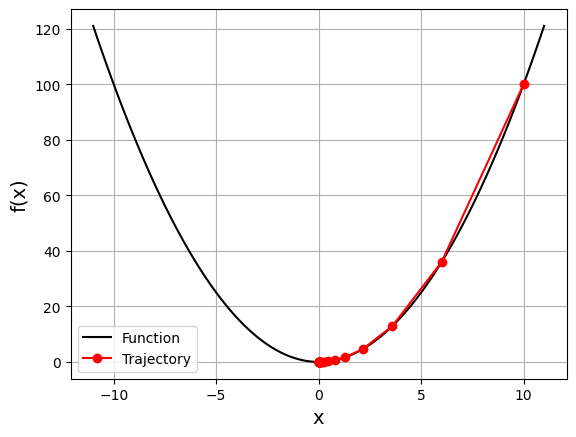

In [4]:
gd_visual(function, gradient, start=10.0, lr=0.2, plot_range=11)

It starts from the rightmost red dot ($x=10$) and move toward the minimum ($x=0$). The updates are larger at first because the value of the gradient (and slope) is higher. As approaching the minimum, updates become lower.

#### 2.2.2. Change learning rate

The learning rate is a very important parameter of the algorithm. Different learning rate values can significantly affect the behavior of gradient descent. Consider the previous example, but with a learning rate of 0.8 instead of 0.2:

current local minimizer =  [-4.77519667e-07]


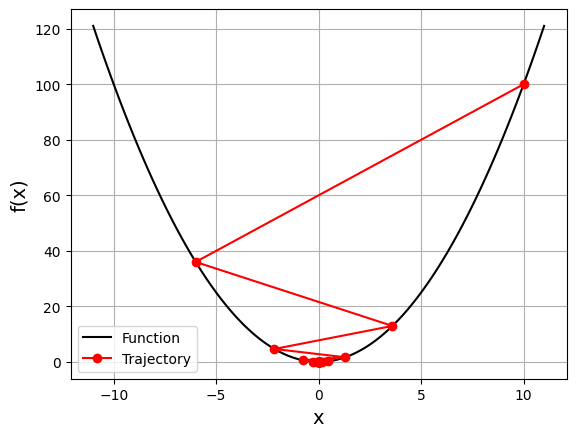

In [5]:
gd_visual(function, gradient, start=10.0, lr=0.8, plot_range=11)

In this case, it again starts with $x=10$, but because of the high learning rate, it gets a large change in $x$ that passes to the other side of the optimum and becomes −6. It crosses zero a few more times before convergence.

So what happens if we change learning rate to a very small value (e.g., $\alpha = 0.005$)?

current local minimizer =  [6.17290141]


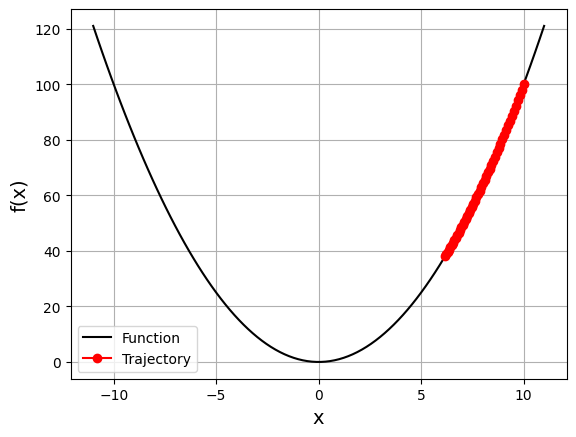

In [6]:
gd_visual(function, gradient, start=10.0, lr=0.005, plot_range=11)

**Question:** To find the local minimizer, what do we need to change except changing learning rate?

*Hint: look at the arguments of the codes.*

current local minimizer =  [9.95251885e-05]


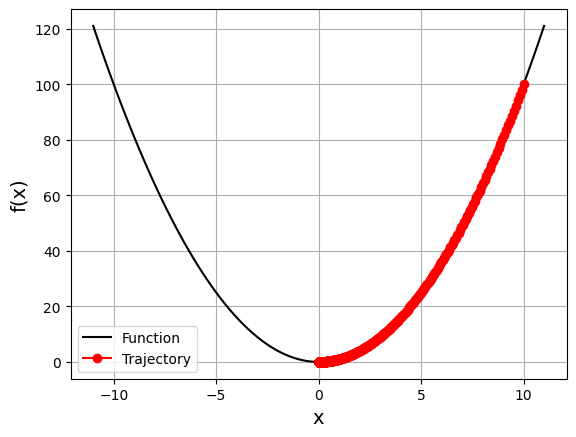

In [7]:
gd_visual(function, gradient, start=10.0, lr=0.005, n_iter=2000, plot_range=11)

#### 2.2.3. Nonconvex function

Nonconvex functions might have local minima or saddle points where the algorithm can get trapped. In such situations, our choice of learning rate or starting point can make the difference between finding a local minimum and finding the global minimum.

Consider a new optimization problem:

$$
\min f(x) = x^4 - 5x^2 -3x
$$

It has a global minimizer at $x \approx 1.6$ and a local minimizer at $x \approx -1.42$. The gradient of this function is:

$$
\frac{\partial f}{\partial x} = 4x^3 - 10x -3
$$

current local minimizer =  [-1.63120206]


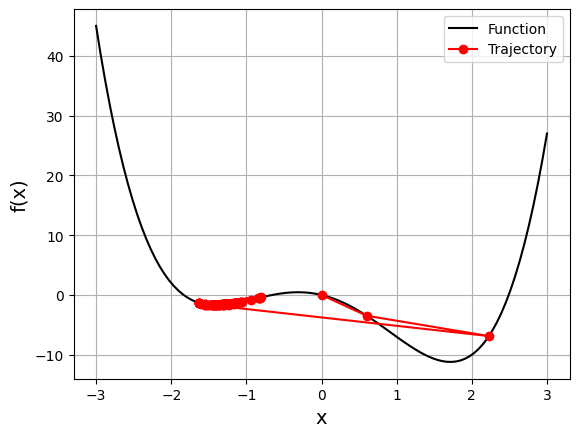

In [8]:
# define new function and gradient
function2 = lambda x: x**4 - 5*x**2 - 3*x
gradient2 = lambda x: 4*x**3 - 10*x -3

gd_visual(function2, gradient2, start=0, lr=0.2, plot_range=3)

We started at zero this time, and the algorithm ended near the local minimum. During the first two iterations, the vector was moving toward the global minimum, but then it crossed to the opposite side and stayed trapped in the local minimum.  

However, we can prevent this with a smaller learning rate:

current local minimizer =  [1.03933248]


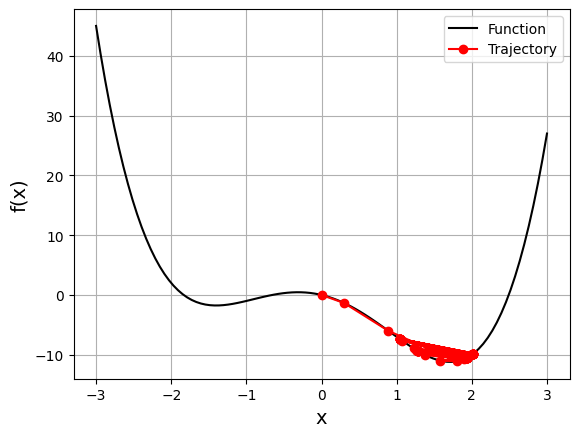

In [9]:
gd_visual(function2, gradient2, start=0, lr=0.1, plot_range=3)

When decreasing the learning rate from 0.2 to 0.1, we get a solution very close to the global minimum. Remember that gradient descent is an approximate method. This time, we avoid the jump to the other side. A lower learning rate prevents the vector from making large jumps, and in this case, the vector remains closer to the global optimum.

Adjusting the learning rate is tricky. We usually can’t know the best value in advance. There are many techniques and heuristics that try to help with this issue. In addition, machine learning practitioners often tune the learning rate during model selection and evaluation. Moreover, besides the learning rate, the starting point can affect the solution significantly, especially with nonconvex functions.

### 2.3. More applications

#### 2.3.1. Univariate

Consider the problem:

$$
\min f(x) = x - \log{x}
$$

The gradient of this function is:


$$
\frac{\partial f}{\partial x} = 1 - \frac{1}{x}
$$

In [10]:
gradient_descent(grad=lambda x: 1 - 1/x, start=2.5, lr=0.5)

1.0000011077232125

With the provided set of arguments, `gradient_descent` correctly calculates that this function has the minimum at $x=1$. We can try it with other values for the learning rate and starting point.

#### 2.3.2. Bivariate

We can also use `gradient_descent` with functions of more than one variable. The application is the same, but we need to provide the gradient and starting points as vectors or arrays. 

For example, we can find the minimum of the problem:

$$
\min f(x_1, x_2) = x_1^2 + x_2^4
$$

With the gradient vector $\left(2x_1, 4x_2^3 \right)$

In [11]:
gradient_descent(grad=lambda x: np.array([2 * x[0], 4 * x[1]**3]), 
                 start=np.array([1.0, 1.0]), lr=0.2, tol=1e-08)

array([8.08281277e-12, 9.75207120e-02])

In this case, our gradient function returns an array, and the start value also is an array, so we would get an array as the result. The resulting values are almost equal to zero, so we can say that `gradient_descent` correctly found that the minimum of this problem is at $x_1 = x_2 = 0$.

#### 2.3.3. Ordinary Least Squares

Linear regression and the ordinary least squares (OLS) method start with the observed values of the inputs $\boldsymbol{x} = \left(x_1, \cdots, x_n\right)$ and outputs $y$. They define a linear function $f(\boldsymbol{x}) = b_0 + b_1 x_1 + \cdots + b_n x_n$, which is as close as possible to observation $y$. This is an optimization problem. It finds the values of weights $b_0, b_1, \cdots, b_n$ that minimize the sum of squared residuals $\text{SSR} = \sum_{i} \left(y_i - f(\boldsymbol{x_i})\right)^2$or the mean squared error $\text{MSE} = \text{SSR} / {n}$. Here, $n$ is the total number of observations and $i = 1, \cdots, n$. We can also use the cost function $\mathcal{L} = \text{SSR} / (2n)$, which is mathematically more convenient than SSR or MSE. 

The most basic form of linear regression is simple linear regression. It has only one set of inputs $x$ and two weights: $b_0$ and $b_1$. The equation of the regression line is $f(x) = b_0 + b_1 x$. Although the optimal values of $b_0$ and $b_1$ can be calculated analytically, we could implement gradient descent to determine them.

First, use calculus to find the gradient of the cost function $\mathcal{L} = \sum_{i} \left(y_i - b_0 - b_1 x_i\right)^2 / (2n)$. Since we have two decision variables, $b_0$ and $b_1$, the gradient $\nabla C$ is a vector with two components:

1. $\frac{\partial \mathcal{L}}{\partial b_0} = \frac{1}{n} \sum_{i} \left(b_0 + b_1 x_i - y_i\right) = \text{mean} \left(b_0 + b_1 x_i - y_i\right)$

2. $\frac{\partial \mathcal{L}}{\partial b_1} = \frac{1}{n} \sum_{i} \left(b_0 + b_1 x_i - y_i\right)x_i = \text{mean} \left(\left(b_0 + b_1 x_i - y_i\right) x_i \right)$

We need the values of $x$ and $y$ to calculate the gradient of this cost function. Our gradient function will have as inputs not only initial $b_0$ and $b_1$ but also $x$ and $y$ as data.

In [12]:
# Compute the SSR of linear regression model
def ssr_gradient(x, y, theta):
    '''
    Function to calculate the gradient of SSR

    Arguments:
        x = the given value for features
        y = the observations
        theta = parameter vector for linear model
    
    Returns: the gradient of SSR
    '''
    # Number of data points
    m = len(y)

    # Insert unit column to X feature matrix
    ones = np.ones(m)
    x_new = np.vstack((ones,x.T)).T

    # Compute residual between prediction and observation
    res = np.dot(x_new, theta) - y
    
    return np.dot(res, x_new)/m

`ssr_gradient` takes the arrays of $x$ and $y$, which contain the inputs and outputs, and the array $b$ that holds the current values of the decision variables $b_0$ and $b_1$. This function first calculates the array of the residuals for each observation and then returns the pair of values of $\partial \mathcal{L} / \partial b_0$ and $\partial \mathcal{L} / \partial b_1$.

Instead of the only objective function, we need to deal with feature $x$ and observation $y$, so there are some small changes from `gradient_descent` to the following `gd_OLS`.

In [13]:
# For the OLS example, we need to fix our gradient_descent
def gd_OLS(grad, x, y, start, lr=0.1, n_iter=50, tor=1e-06):
    '''
    Function of gradient descennt method for OLS
    
    Arguments:
        grad = the gradient of given function or objective
        x = arrays of inputs/features
        y = arrays of outputs/observations
        start = the starting points for input
        lr = learning rate
        n_iter = the number of iterations for visualization
        tol = tolerance to stop the algorithm

    Returns:
        optimal solution for OLS
    '''
    # Initializing the values of the variables
    vector = start

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Recalculating the difference
        diff = -lr * np.array(grad(x, y, vector)) ### changed line
        
        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tor):
            break
        
        # Updating the values of the variables
        vector += diff
    
    return vector

`gradient_descent` now accepts the inputs $x$ and outputs $y$ and can use them to calculate the gradient. Converting the result of `grad(x, y, vector)` to a `NumPy` array enables elementwise multiplication of the gradient elements by the learning rate, which is not necessary in the case of a single-variable function.

In [14]:
# use gd_OLS to find the regression line for some arbitrary values of x and y
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

gd_OLS(ssr_gradient, x, y, start=[0.5, 0.5], lr=0.0008, n_iter=100_000)

array([5.62822349, 0.54012867])

The result is an array with two values that correspond to the decision variables: $b_0 = 5.63$ and $b_1 = 0.54$. The best regression line is $f(x) = 5.63 + 0.54x$. As in the previous examples, this result heavily depends on the learning rate. You might not get such a good result with too low or too high of a learning rate.

In [15]:
# Visualization for the given OLS example
def gd_OLS_visual(grad, x, y, start, lr=0.1, n_iter=50, tol=1e-06):
    '''
    Visualization function just for OLS 

    Arguements:
        grad = the gradient of given function or objective
        x = arrays of inputs/features
        y = arrays of outputs/observations
        start = the starting points for input
        lr = learning rate
        n_iter = the number of iterations for visualization
        tol = tolerance to stop the algorithm

    Returns: plots between GD regression results and observations
    '''
    # Initializing the values of the variables
    vector = start

    # Performing the gradient descent loop
    for i in range(n_iter):
        # Recalculating the difference
        diff = -lr * np.array(grad(x, y, vector)) ### changed line

        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tol):
            break
        
        # Updating the values of the variables
        vector += diff

    # plot the given x and y
    plt.scatter(x, y, color='red', label='Observation')

    # plot the regression line
    xlist = np.linspace(np.min(x), np.max(x), 100)
    reg = lambda x: vector[0] + vector[1]*x
    plt.plot(xlist, reg(xlist), color='black', label='Regression')
    plt.xlabel(r'x', fontsize=14)
    plt.ylabel(r'y', fontsize=14)
    plt.legend(loc='best')
    plt.grid()

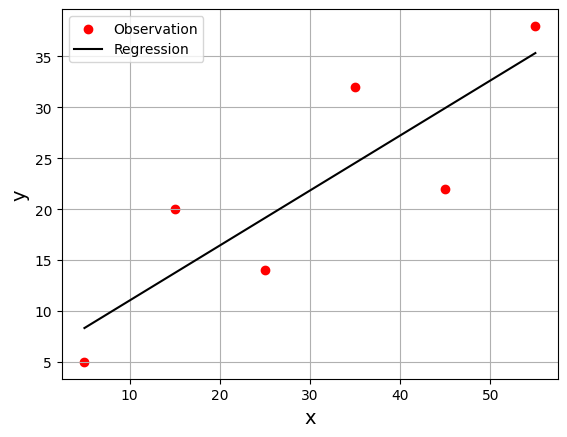

In [16]:
gd_OLS_visual(ssr_gradient, x, y, start=[0.5, 0.5], lr=0.0008, n_iter=100_000)

## 3. Stochastic Gradient Descent Algorithms

A recurring problem in machine learning is that large training sets are necessary for good generalization, but large training sets are also more computationally expensive. On the contrary, the stochastic gradient descent samples a **minibatch** of examples drawn uniformly from the training set on each updating step, which is the reason named as "**stochastic**".

To be mentioned, there are several different definitions and classifications for SGD, here we follows the definition in **Section 5, [Deep Learning](https://www.deeplearningbook.org/) by Goodfellow, et al**, which call gradient descent on minibatches as stochastic gradient descent. Stochastic approaches is that not only is the gradient over few examples cheaper to compute, not getting the exact direction (using only a small number of examples), but actually leads to better solutions. This is particularly true for large datasets with redundant information wherein the examples might not be too different from each other. Another reason for stochastic approaches performing better is the presence of multiple local minima with different depths. In a sense, the noise in the direction allows for jumping across the trenches while a fullbatch approach will converge in the trench it started with.

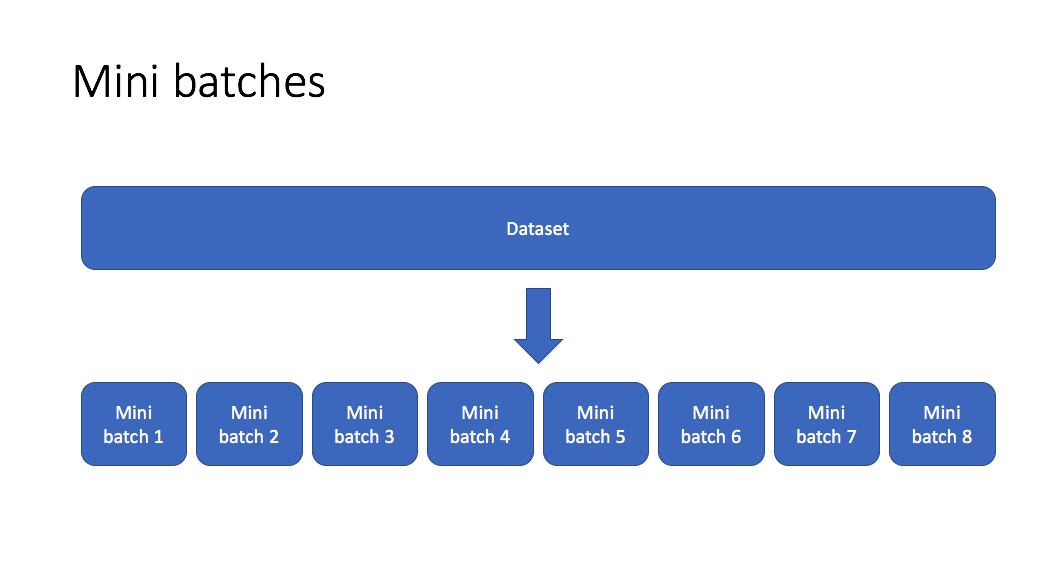

### 3.1. Formulation

Typically, the problem is formulated as an optimization problem (Wei Wu, 2011):
$$
\begin{equation}
\theta_t^* = \arg \underset{\theta}{\min} \frac 1 t \sum_{i=1}^{t} \left(L(f_{\theta}(x_i), y_i) + R(\theta)\right)
\end{equation}
$$
where $t$ is the number of data points, $\theta_t^*$ is the parameter that minimize the empirical cost, $(x_i, y_i)$ are the $i^{th}$ training example, $L(s, y)$ is a loss function which gives small value if $s$ is a good prediction for $y$, and $R(\theta)$ is a regularization function for $\theta$  which typically gives small value for small $\theta$. 

For stochastic gradient descent (SGD) method, let $d=(x, y)$ be one data sample, $l(\theta, d) = L(f_{\theta}(x), y) + R(\theta)$ be the cost of $\theta$ for $d$, $g(\theta, \xi) = \frac{\partial l(\theta, d)}{\partial \theta}$ be the gradient function, and $D_t = (d_1, \cdots, d_t)$ be all the training samples at $t^{th}$ step. The SGD method updates $\theta$ according to its  stochastic gradient:
$$
\begin{equation}
    \theta_t = \theta_{t-1} - \alpha g(\theta_{t-1}, d_t)
\end{equation}
$$

The formulation of gradient descent is very similar to the above equation but focusing on total data samples in each iteration:
$$
\begin{equation}
\theta_t = \theta_{t-1} - \alpha G(\theta_{t-1})
\end{equation}
$$

The algorithm involves three main steps:
1. Random selection of a sample or a set of samples from the data set.
2. Computation of the gradient of the objective function.
3. Updating the values of the variables in the optimization problem based on the
gradient and step length.

**Pseudocode:** 
(*The different parts in pseudocode compared to gradient descent are in bold.*)

* Initialize the starting point $\theta^0$ and the model hyperparameters (e.g., learning rate $\alpha$ and **minibatch size $n$**)

* In each **epoch**:
 
  1. Shuffle and split the training data set by size $n$.

  2. In the $t$'s **batch**:

    (a) compute the gradient $\nabla \theta^t$ of the current batch

    (b) update to get $\theta^{t+1} = \theta^t - \alpha \nabla \theta^t$

    (c) (Optional) Check convergence: if $\lvert \theta^{t+1} - \theta^t \rvert < \epsilon$, then STOP.


*To be mentioned, in deep learning compared with iteration/step, "epoch" can be understood as the number of times the algorithm scans the entire data. Although we add the convergence checking procedure, in deep learning we usually take the epoch number or comparison to test set as stopping criterion.*


In [17]:
def sgd(grad, x, y, start, lr=0.1, batch_size=1, n_iter=50,
        tol=1e-06, dtype="float64", random_state=None, trajectory=False, 
        costfunc=None, verbose=False, check_flag = False):
    '''
    Function of stochastic gradient descent algorithm

    Arguments:
        grad = the function or any Python callable object that 
                  takes a vector and returns the gradient of the function to minimize
        x = arrays of inputs/features
        y = arrays of outputs/observations
        start = the points where the algorithm starts its search
        lr = the learning rate that controls the magnitude of the vector update
        batch_size = specify the number of observations in each minibatch
        n_iter = the number of iterations
        tol = tolerance to stop the algorithm
        dtype = the data type of NumPy array
        
    Arguments (optional):
        random_state = the seed of the random number generator for stochaisticity
        trajectory = boolean to determine if return trajectories or optima
        costfunc = function to compute cost
        verbose = boolean to determine if printing out
        check_flag = boolean to determine whether checking convergence

    Returns:
        vector = minimizer solution
        traj = optimization trajectories
        cost = trajectories of how cost changes
    '''

    # Checking if the gradient is callable
    if not callable(grad):
        raise TypeError("'grad' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)
    cost = []
    traj = vector.copy()

    # Setting up and checking the learning rate
    lr = np.array(lr, dtype=dtype_)
    if np.any(lr <= 0):
        raise ValueError("'lr' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tol = np.array(tol, dtype=dtype_)
    if np.any(tol <= 0):
        raise ValueError("'tol' must be greater than zero")

    # Setting the difference to zero for the first iteration
    diff = np.zeros_like(vector)
    
    # Setting the flag to stop the nested loops
    flag = False
    
    # Performing the gradient descent loop
    for i in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:].reshape(-1, )

            # Compute the cost
            if costfunc != None:
                cost.append(costfunc(x_batch, y_batch, vector))
            
            ### BEGIN SOLUTION
            # Recalculating the difference
            gradient = np.array(grad(x_batch, y_batch, vector), dtype_)
            diff = - lr * gradient
            
            # Checking if the absolute difference is small enough
            if check_flag and np.all(np.abs(diff) <= tol):
                flag = True
                break

            # Updating the values of the variables
            vector +=  diff
            traj = np.vstack((traj, vector))
            ### END SOLUTION
        
        # Break the nested loop
        if flag: break
    
    # print out results
    if verbose:   
        print("After {} epochs, the current theta = {}".format(i, vector) )
    
    if not trajectory:
        return vector if vector.shape else vector.item()
    else:
        return np.asarray(traj), np.asarray(cost)

Just a quick test of `sgd` function on the previous OLS data.

In [18]:
# SGD quick test on previous OLS example
OLS_opt = sgd(ssr_gradient, x, y, start=np.array([0.5, 0.5]), 
              lr=0.0008, batch_size=x.shape[0], n_iter=100_000, 
              random_state=42, verbose=True, check_flag=True)

After 35317 epochs, the current theta = [5.62822349 0.54012867]


### 3.2. Parametric study

In this part we use a synthetic dataset and fit a model to predict $y$ from a given $x_0$ and $x_1$. 

Now the multivariate linear regression model could be regarded as:

$$
y = b + w^Tx
$$

where $b$ is scalar, $w = (w_0, w_1, \cdots, w_n)$,  $x = (x_0, x_1, \cdots, x_n)$ and $y = (y_0, y_1, \cdots, y_n)$

Or 

$$
y = \theta^Tx
$$

where $\theta = (\theta_0, \theta_1, \cdots, \theta_{n+1})$ and $y = (y_0, y_1, \cdots, y_n)$ but $x = (1, x_0, x_1, \cdots, x_n)$

The objective function is:

$$
\min_{\theta} = \sum_{j=1}^n \mathcal{L}(y_j, f(x_j, \theta)) = \sum_{j=1}^n \mathcal{L}(y_j, \theta^Tx_j)
$$

The cost function is:

$$
\mathcal{L}(\theta) = \frac{1}{2n}\sum_{j=1}^n (\theta^T x_j - y_i)^2
$$

Therefore, the gradient of cost function is:

$$
\frac{\partial \mathcal{L}}{\partial \theta_i} = \frac{1}{n} \sum_{j} \left(\theta^Tx_j - y_j\right)x_i = \text{mean} \left(\left(\theta^Tx_j - y_j\right) x_i \right)
$$


**Question:** Some people believe the $\frac{1}{2}$ in cost function is only convenient to cancel when calculating the derivatives. However, there is a further reason, please try to answer it.

<!-- https://math.stackexchange.com/questions/884887/why-divide-by-2m -->

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, norm, multivariate_normal
np.random.seed(25)

# Generate the dataset
def lg_generate():
    NPoints = 500  # Number of (x,y) pairs in synthetic dataset
    noiseSD = 0.1  # True noise standard deviation

    # Get x points from a uniform distribution from [-1  to 1]
    x0 = 2 * uniform().rvs(NPoints) - 1
    x1 = (2 * uniform().rvs(NPoints) - 1)*3

    # trasnform x1
    x1 =  np.square(x1)

    # Random Error from a gaussian
    epsilon = norm(0, noiseSD).rvs(NPoints)

    # True regression parameters that we wish to recover
    # for the following visualization, we only activate parameters for w
    b = 0
    w0 = 3
    w1 = -2

    # Get the y from given x using specified weights 
    # and add noise from gaussian with true noise 
    y = b + w0*x0 + w1*x1 + epsilon
    data = {'y': y, 'x0': x0, 'x1': x1}
    data = pd.DataFrame(data)

    return data

In [20]:
# prepare the data
data = lg_generate()
data

y        x0        x1
0   -13.321243  0.740248  7.840247
1    -2.924226  0.164554  1.777122
2   -12.102443 -0.442322  5.360247
3    -2.333845 -0.628178  0.259101
4   -12.753478 -0.177800  6.178104
..         ...       ...       ...
495  -3.950203 -0.970749  0.493724
496  -3.649303 -0.905959  0.452464
497  -5.681409 -0.711615  1.693122
498  -2.666745 -0.911644  0.002498
499 -12.825002  0.677941  7.429958

[500 rows x 3 columns]

#### 3.2.1. Cost function

In [21]:
def cost(X,y,theta):
    ''' 
    Function to calculate cost function assuming a hypothesis of form h = theta.T*X
    
    Arguments:
        X = array of features
        y = array of training examples
        theta = array of parameters for hypothesis

    Returns:
        J = cost function
    '''

    # Number of data points 
    m = len(y)

    # Insert unit column to X feature matrix
    ones = np.ones(m)
    x_new = np.vstack((ones,X.T)).T

    # Compute predictions
    h = np.dot(x_new, theta)

    # Compute cost
    J = 1/(2*m)*np.sum((h-y)**2)

    return J

In [22]:
'''
SSR gradient has been defined in the first section, here is just a backup.
'''

# # Compute the SSR of linear regression model
# def ssr_gradient(x, y, theta):
#     '''
#     Function to calculate the gradient of SSR

#     Arguments:
#         x = the given value for features
#         y = the observations
#         theta = parameter vector for linear model
    
#     Returns: the gradient of SSR
#     '''
#     # Number of data points
#     m = len(y)

#     # Insert unit column to X feature matrix
#     ones = np.ones(m)
#     x_new = np.vstack((ones,x.T)).T

#     # Compute residual between prediction and observation
#     res = np.dot(x_new, theta) - y
    
#     return np.dot(res, x_new)/m

'\nSSR gradient has been defined in the first section, here is just a backup.\n'

Text(0, 0.5, '$w_1$')

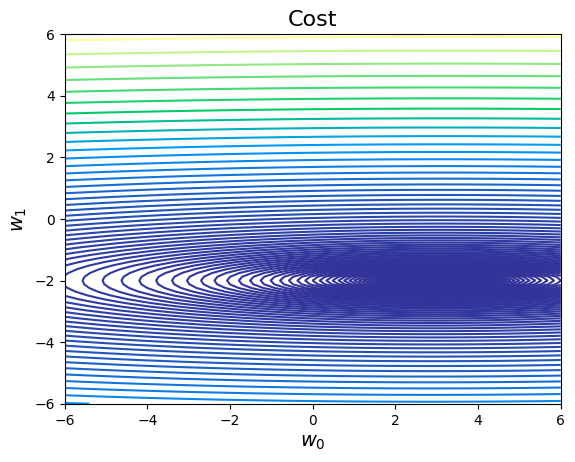

In [23]:
# Plot the surface for all values of a0 and a1 between [-6 and 6]
def costMaker(X, y):
    '''
    Vectorize the cost field
    '''
    def out(w0, w1):     
        return cost(X, y, np.array([0, w0, w1]))
    return np.vectorize(out)

# Set up the plot range
grid = w0_grid = w1_grid = np.linspace(-6, 6, 100)
G0, G1 = np.meshgrid(w0_grid, w1_grid)

# Convert from pandas data frame to numpy array
X  = data.iloc[:,1:].to_numpy()
Y = data.iloc[:,0].to_numpy()

# Compute the contours of costs
costfunc= costMaker(X, Y)
cost_2d = costfunc(G0, G1)

# Plot
plt.contour(G0, G1, cost_2d,  np.logspace(-2,3,100), cmap='terrain')
plt.title("Cost", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=14)
plt.ylabel(r"$w_1$", fontsize=14)

In [24]:
# Choose learning rate = 0.12
traj_out, cost_out = sgd(ssr_gradient, X, Y, start=np.array([0, -3.3, 2]), lr=0.11, batch_size=500, n_iter=100, random_state=42, trajectory=True, costfunc=cost)

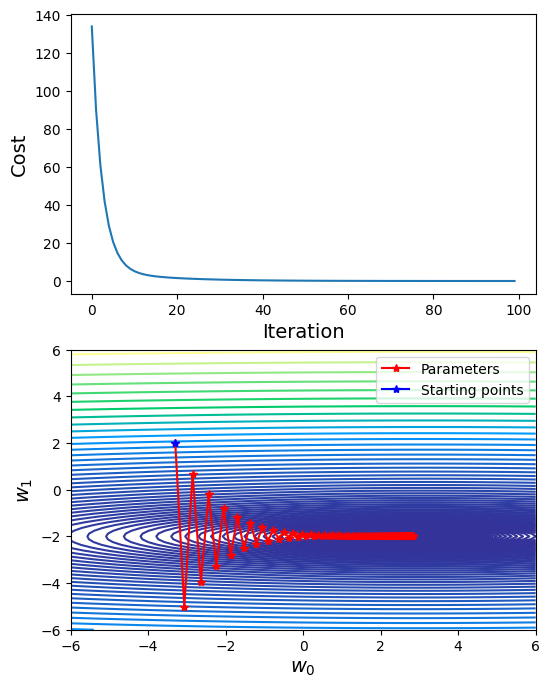

In [25]:
## Visualization

# Plot cost
fig, axs = plt.subplots(2,1, figsize=(6,8))
axs[0].plot(cost_out)
axs[0].set_xlabel("Iteration", fontsize=14)
axs[0].set_ylabel("Cost", fontsize=14)

# Plot trajectory of w_0, w_1
axs[1].contour(G0, G1, cost_2d,  np.logspace(-2,3,100), cmap='terrain')
axs[1].plot(traj_out[:, 1], traj_out[:, 2], label="Parameters", marker="*", color="r")
axs[1].plot(traj_out[0, 1], traj_out[0, 2], label="Starting points", marker="*", color="b")
axs[1].set_xlabel(r"$w_0$", fontsize=14)
axs[1].set_ylabel(r"$w_1$", fontsize=14)
axs[1].set_xlim([-6, 6])
axs[1].set_ylim([-6, 6])
axs[1].legend()

#### 3.2.2. Change Values of $\alpha$

Similar to the section of gradient descent, we can change the hyperparameter learning rate $\alpha$ and explore its effect for stochastic gradient descent.

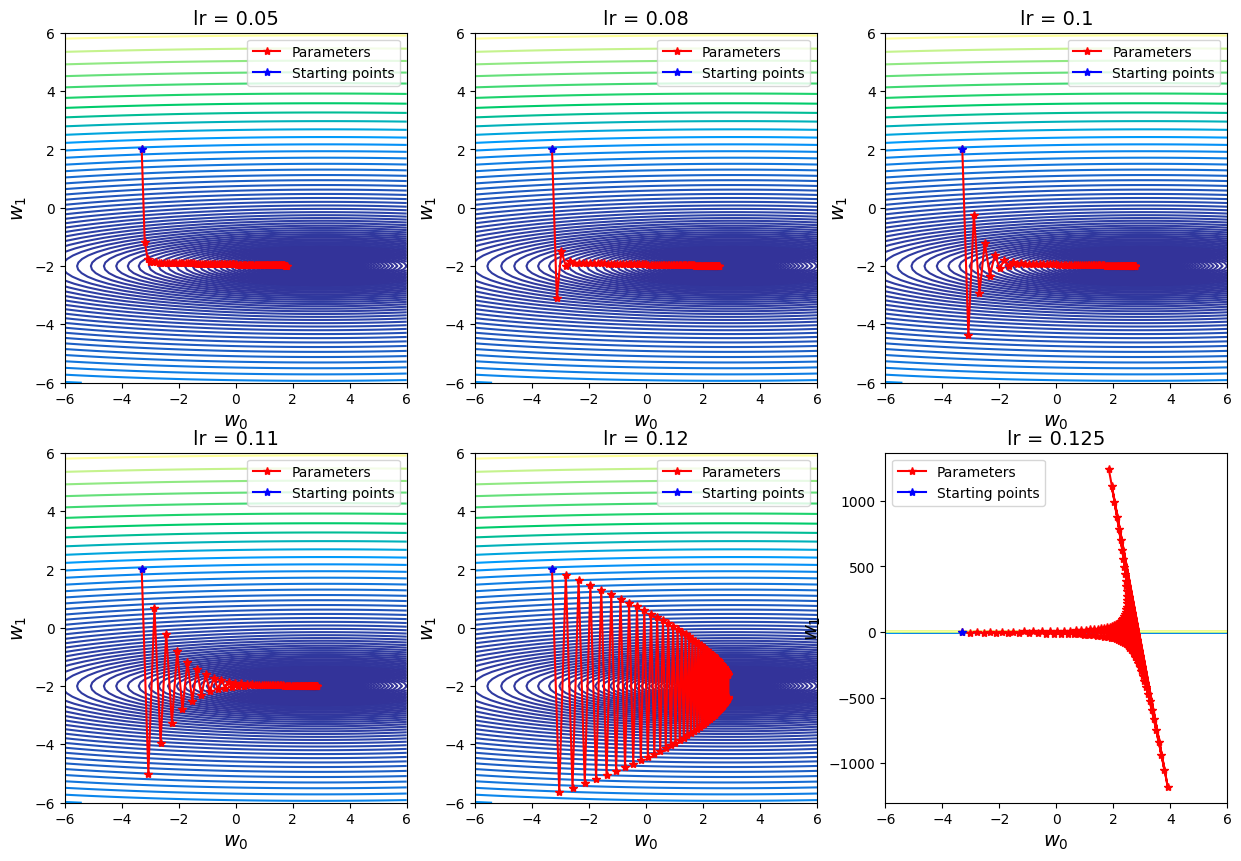

In [26]:
# Prepare alpha list
alpha_list = [0.05, 0.08, 0.10, 0.11, 0.12, 0.125]

## Visualization
fig, axs = plt.subplots(2,3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
    # Find trajectory for the current alpha
    traj_out, _ = sgd(ssr_gradient, X, Y, start=np.array([0, -3.3, 2]), lr=alpha_list[i], batch_size=500, n_iter=100, random_state=42, trajectory=True, costfunc=cost)
    # Plot
    ax.contour(G0, G1, cost_2d, np.logspace(-2,3,100), cmap='terrain')
    ax.plot(traj_out[:, 1], traj_out[:, 2], label="Parameters", marker="*", color="r")
    ax.plot(traj_out[0, 1], traj_out[0, 2], label="Starting points", marker="*", color="b")
    ax.set_title("lr = " + str(alpha_list[i]), fontsize=14);
    ax.set_xlabel(r"$w_0$", fontsize=14)
    ax.set_ylabel(r"$w_1$", fontsize=14)
    ax.legend()

**Discussion** 

Choosing the learning rate is pretty challenging. If the learning rate is too small, which may result in a long training process that could get stuck; whereas a learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, or make the training unstable with many big fluctuations.

From the above plots, I took different values of learning rate with the same iteration times (e.g. 100) and full batch. It is easy to see that when $\alpha = 0.12$ (just slightly greater than the given value), the zig-zag behavior of the cost function becomes more unstable and harder to converge. Another small increment (e.g. $\alpha \geq 0.125$) would make the computation blow up. When $\alpha$ is very small (e.g. $\alpha = 0.05$, within the 100 iterations the algorithm cannot reach out the minimum, the rate is slowed down by small $\alpha$.

#### 3.2.3. Change Values of Batch Size

Since we know the minibatch is the key of stochastic gradient descent, here we change the batch size and analyze its relation to training loss curve.

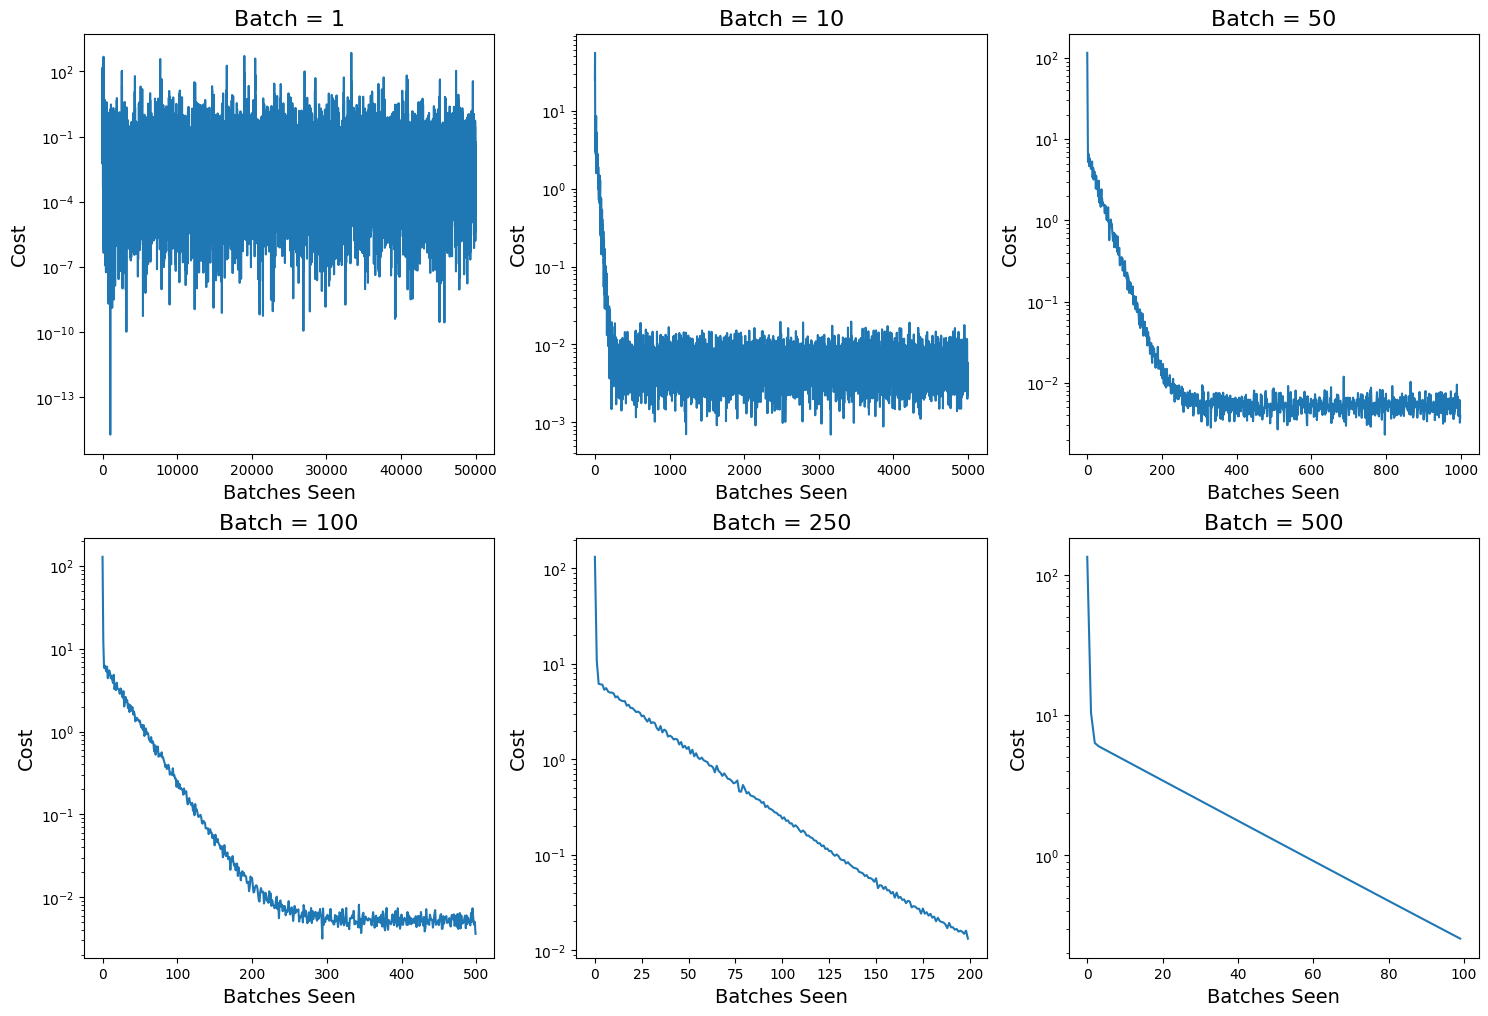

In [27]:
# Prepare minibatch size list
batch_list = [1, 10, 50, 100, 250, 500]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot the cost vs number of batch seen
for i, ax in enumerate(axs.flatten()):
    _, cost_out = sgd(ssr_gradient, X, Y, start=np.array([0, -3.3, 2]), lr=0.05, batch_size=batch_list[i], n_iter=100, random_state=42, trajectory=True, costfunc=cost)   
    ax.plot(cost_out)
    ax.set_xlabel("Batches Seen", fontsize=14)
    ax.set_ylabel("Cost", fontsize=14)
    ax.set_yscale('log')
    ax.set_title("Batch = " + str(batch_list[i]), fontsize=16)

**Discussion:** From the plots of cost versus batches, we can see after 100 epochs, minibatch size $n=1$ seems to find lowest error; with $n$ increasing, the fluctuations become smaller, but it also becomes harder to convergent. 

However, is it reasonable only comparing the costs along batches instead of epochs?


### 3.3. Computational cost analysis

Instead of showing the cost vs the number of batch seen, we need to average the costs over batches in each epoch for relevent comparison.

Since we need to shuffle the data set and split which involving details of codes, so it is not reasonable if we directly record the wall time for each running. So we should count or use computational complexity for comparison. Consider the objective function is:

$$
\min_{\theta} = \sum_{j=1}^n \mathcal{L}(y_j, f_{\theta}(x_j))
$$

And the gradient of cost function is:

$$
\frac{\partial \mathcal{L}}{\partial \theta_i} = \frac{1}{n} \sum_{j} \left(f_{ \theta}(x_j) - y_j\right)x_i
$$

Assume the total data number is $N$, after each epoch we evaluate $f(\cdot)$ by $N$ times, and evaluate $\frac{\partial f}{\partial \theta}$ by $0$ times. So in the above example varying batch size, we set all epochs $ = 100$, theoretically all of them took the same total evaluation times as $100N$. Roughly speaking, all of them took the same computational cost.

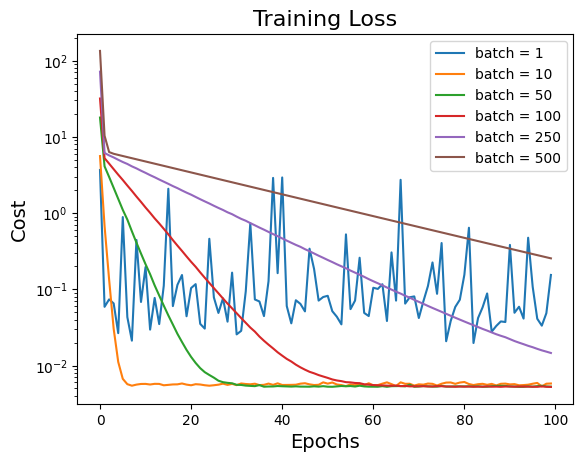

In [28]:
# Plot cost vs number of epochs
for i  in range(len(batch_list)):
    _, cost_out = sgd(ssr_gradient, X, Y, start=np.array([0, -3.3, 2]), lr=0.05, batch_size=batch_list[i], n_iter=100, random_state=42, trajectory=True, costfunc=cost)
    # compute the average cost in each epoch
    ### BEGIN SOLUTION
    cost_out_epoch = [np.mean(arr) for arr in np.array_split(cost_out, 100)]
    ### END SOLUTION
    plt.plot(cost_out_epoch, label="batch = " + str(batch_list[i]))
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.yscale('log')
plt.title("Training Loss", fontsize=16)
plt.legend()

**Discussion:**

From the plot of cost versus epochs, the model cannot converge after 100 epochs if choosing batch size $n = 250$ and $n = 500$. However, if choosing batch size too small, e.g. $n = 1$, there are so many big fluctuations and cost is hard to decrease. Usually, size of minibatch is from 50 to 256 but case-dependent.

###  3.4. Takeaway conclusion

**Pros:**

* Since only some samples are used to calculate the gradient in each update, the training rate is fast and contains a certain degree of randomness, but from the perspective of expectation, the gradient calculated each time is basically the correct derivative. Although SGD sometimes fluctuates obviously and takes many detours, the requirements for gradients are very low (calculating gradients is fast for small batch). And for the introduction of noise, a lot of theoretical and practical work has proved that as long as the noise is not particularly large, SGD can converge well .

* Training is fast when applied to large datasets. For example, take hundreds of data points from millions of data samples each time, calculate an minibatch gradient, and update the model parameters. Compared with traversing all samples of the standard gradient descent method, it is much faster to update the parameters every time a sampled minibatch as input.


**Cons:**

* Choosing a proper learning rate can be difficult. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.

* Learning rate schedules try to adjust the learning rate during training by e.g. annealing, i.e. reducing the learning rate according to a pre-defined schedule or when the change in objective between epochs falls below a threshold. These schedules and thresholds, however, have to be defined in advance and are thus unable to adapt to a dataset's characteristics.

* Additionally, the same learning rate applies to all parameter updates. If our data is sparse and our features have very different frequencies, we might not want to update all of them to the same extent, but perform a larger update for rarely occurring features.

* Another key challenge of minimizing highly non-convex error functions common for neural networks is avoiding getting trapped in their numerous suboptimal local minima. Dauphin et al. argue that the difficulty arises in fact not from local minima but from saddle points, i.e. points where one dimension slopes up and another slopes down. These saddle points are usually surrounded by a plateau of the same error, which makes it notoriously hard for SGD to escape, as the gradient is close to zero in all dimensions.

### 3.5. Variants of SGD

Due to the challenges for vanilla SGD, some effective variants of SGD become popular:

1. **Momentum:** Instead of depending only on the current gradient to update the weight, gradient descent with momentum (Polyak, 1964) replaces the current gradient with m (“momentum”), which is an aggregate of gradients. This aggregate is the exponential moving average of current and past gradients (i.e. up to time $t$). 

2. **AdaGrad:** Adaptive gradient, or AdaGrad (Duchi et al., 2011), acts on the learning rate component by dividing the learning rate by the square root of $\nu$, which is the cumulative sum of current and past squared gradients (i.e. up to time $t$). Note that the gradient component remains unchanged like in SGD.

3. **RMSprop:** Root mean square prop or RMSprop (Hinton et al., 2012) is another adaptive learning rate that tries to improve AdaGrad. Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the exponential moving average of these gradients.

4. **Adadelta:** Adadelta (Zeiler, 2012) is also another improvement from AdaGrad, focusing on the learning rate component. Adadelta is probably short for 'adaptive delta', where delta here refers to the difference between the current weight and the newly updated weight.

5. **Nesterov Accelerated Gradient (NAG):** a similar update to momentum for was implemented using Nesterov Accelerated Gradient (Sutskever et al., 2013). 

6. **Adam:** Adaptive moment estimation, or Adam (Kingma & Ba, 2014), is simply a combination of momentum and RMSprop. It acts upon the gradient component, the exponential moving average of gradients (like in momentum), and the learning rate component by dividing the learning rate $\alpha$ by square root of $\nu$, the exponential moving average of squared gradients (like in RMSprop).

7. **AdaMax:** AdaMax (Kingma & Ba, 2015) is an adaptation of the Adam optimizer by the same authors using infinity norms (hence ‘max’).

8. **Nadam:** Nadam (Dozat, 2015) is an acronym for Nesterov and Adam optimizer. The Nesterov component here, is a more efficient modification.

9. **AMSGrad:** Another variant of Adam is the AMSGrad (Reddi et al., 2018). This variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current $\nu$ is always larger than the $\nu$ from the previous time step.

The following table shows these optimizers differ: (1) adapt the "gradient component" and (2) adapt the "learning rate component". More details can be found at [here](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9).

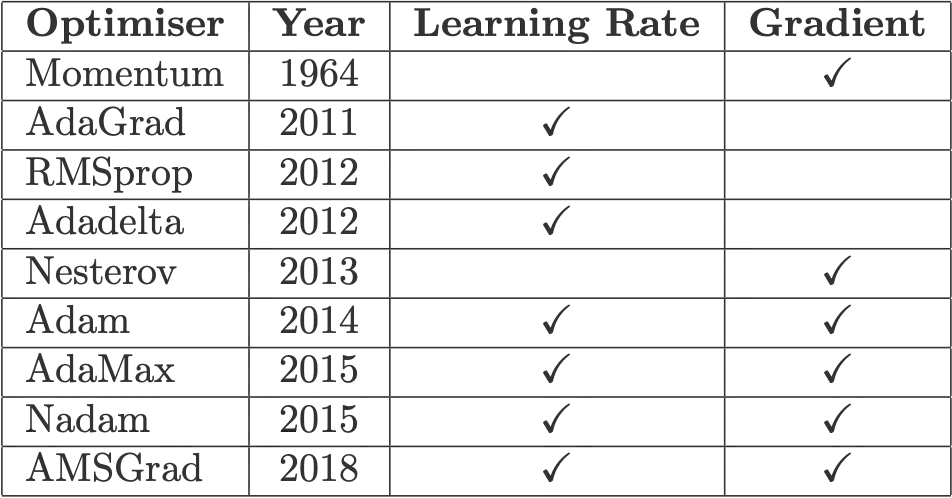

## 4. Comparison between GD and Newton-based method

After case study and parametric study on SGD and GD methods, we want to further compare the behaviour of gradient descent and other Newton-based methods as **Homework: Algorithm 3**. As discussed in previous sections, shuffling and splitting data into batches then optimizing each batch by gradient descent, which is exactly the stochastic gradient descent. Theoretically, we can use any optimizer for minibatches. In this section, we would not use data set anymore, however, we would use several functions to imitate the shape of trainable parameter space and explore the performance of these methods.

### 4.1. Newton-based method

The following codes are obtained from **Homework: Algorithm 3**.

In [29]:
from scipy import linalg

def check_nan(A):
    return np.sum(np.isnan(A))

## Linear algebra calculation
def xxT(u):
    '''
    Calculates u*u.T to circumvent limitation with SciPy
    
    Arguments:
    u - numpy 1D array
    
    Returns:
    u*u.T
    
    Assume u is a nx1 vector.
    Recall: NumPy does not distinguish between row or column vectors
    
    u.dot(u) returns a scalar. This functon returns an nxn matrix.
    '''
    
    n = len(u)
    A = np.zeros([n,n])
    for i in range(0,n):
        for j in range(0,n):
            A[i,j] = u[i]*u[j]
    
    return A

def unconstrained_newton(calc_f,calc_grad,calc_hes,x0,verbose=False,max_iter=50,
                         algorithm="Newton",globalization="Line-search", # specify algorithm
                         eps_dx=1E-6,eps_df=1E-6, # Convergence tolerances (all)
                         eta_ls=0.25,rho_ls=0.9,alpha_max=1.0, # line search parameters
                         delta_max_tr=10.0,delta_0_tr=2.0, # trust region parameters
                         kappa_1_tr = 0.25, kappa_2_tr = 0.75, gamma_tr=0.125, # trust region parameters
                         output = False # output iterative updates
                        ):
    '''
    Newton-Type Methods for Unconstrained Nonlinear Continuous Optimization
    
    Arguments (required):
        calc_f : function f(x) to minimize [scalar]
        calc_grad: gradient of f(x) [vector]
        calc_hes: Hessian of f(x) [matrix]
    
    Arguments (options):
        algorithm : specify main algorithm.
            choices: "Newton", "SR1", "BFGS", "Steepest-descent"
        
        globalization : specify globalization strategy
            choices: "none", "Line-search", "Trust-region"
       
        eps_dx : tolerance for step size norm (convergence), eps1 in notes
        
        eps_df : tolerance for gradient norm (convergence), eps2 in notes
        
        eta_ls : parameter for Goldstein-Armijo conditions (line search only)
        
        rho_ls : parameter to shrink (backstep) line search
        
        alpha_max : initial step length scaling for line search and/or steepest-descent
    
        delta_max_tr : maximum trust region size
        
        delta_0_tr : initial trust region size
        
        kappa_1_tr : 'shrink' tolerance for trust region
        
        kappa_2_tr : 'expand' tolerance for trust region
        
        gamma_tr : 'accept step' tolerance for trust region
    
    Returns:
        x : iteration history for x (decision variables) [list of numpy arrays]
        f : iteration history for f(x) (objective values) [list of numpy arrays]
        p : iteration history for p (steps)
        B : iteration history for Hessian approximations [list of numpy arrays]
    '''
    
    # Allocate outputs as empty lists
    x = [] # decision variables
    f = [] # objective values
    p = [] # steps
    grad = [] # gradients
    alpha = [] # line search / steepest descent step scalar
    B = [] # Hessian approximation
    delta = [] # trust region size
    rho = [] # trust region actual/prediction ratio
    step_accepted = [] # step status for trust region. True means accepted. False means rejected.
    
    # Note: alpha, delta and rho will remain empty lists unless used in the algorithm below
    
    # Store starting point
    x.append(x0)
    k = 0
    
    flag = True
    
    # Print header for iteration information
    if output:
        print("Iter. \tf(x) \t\t||grad(x)|| \t||p|| \t\tmin(eig(B)) \talpha \t\tdelta \t\tstep")
    
    while flag and k < max_iter:
        # Evaluate f(x) at current iteration
        f.append(calc_f(x[k]))
        
        # Evaluate gradient
        grad.append(calc_grad(x[k]))
        
        if(check_nan(grad[k])):
            print("WARNING: gradiant calculation returned NaN")
            break
        
        if verbose:
            print("\n")
            print("k = ",k)
            print("x = ",x[k])
            print("grad = ",grad[k])
            print("f = ",f[k])

        # Calculate exact Hessian or update approximation
        if(algorithm == "Newton"):
            B.append(calc_hes(x[k]))
        
        elif k == 0 or algorithm == "Steepest-descent":
            # Initialize or set to identity
            B.append(np.eye(len(x0)))
        
        elif algorithm == "SR1" or algorithm == "BFGS":
            # Change in x
            s = x[k] - x[k-1]

            # Change in gradient
            y = grad[k] - grad[k-1]

            if verbose:
                print("s = ",s)
                print("y = ",y)
            
            if algorithm == "SR1": # Calculate SR1 update
                dB = sr1_update(s, y, k, B, verbose)
                B.append(B[k-1] + dB)
                
            else: # Calculate BFGS update  
                dB = bfgs_update(s, y, k, B, verbose)
                B.append(B[k-1] + dB) 

        else:
            print("WARNING. algorithm = ",algorithm," is not supported.")
            break

        if verbose:
            print("B = \n",B[k])
            print("B[k].shape = ",B[k].shape)
            
        if(check_nan(B[k])):
            print("WARNING: Hessian update returned NaN")
            break
            
        c = np.linalg.cond(B[k])
        if c > 1E12:
            flag = False
            print("Warning: Hessian approximation is near singular.")
            print("B[k] = \n",B[k])
        
        else:
            
            # Solve linear system to calculate step
            pk = linalg.solve(B[k],-grad[k])
            
            if globalization == "none":
                if algorithm == "Steepest-descent":
                    # Save step and scale by alpha_max
                    p.append(pk*alpha_max)
                    
                else:
                    # Take full step
                    p.append(pk)
                    
                # Apply step and calculate x[k+1]
                x.append(x[k] + p[k])
                    
            elif globalization == "Line-search":
                
                # Line Search Function
                update, alphak = line_search(x, f, grad, calc_f, pk, k, alpha_max, eta_ls, rho_ls, verbose)
                
                # Now the line search is complete, apply final value of alphak
                p.append(update)
                
                # Save alpha
                alpha.append(alphak)
                
                # Apply step and calculate x[k+1]
                x.append(x[k] + p[k])
            
            elif globalization == "Trust-region":
                
                # Trust region function
                update = trust_region(x, grad, B, delta, k, pk, delta_0_tr, verbose)
                p.append(update)
                
                ### Trust region management

                # Actual reduction
                ared = f[k] - calc_f(x[k] + p[k])

                # Predicted reduction
                pred = -(grad[k].dot(p[k]) + 0.5*p[k].dot(B[k].dot(p[k])))

                # Calculate rho
                if ared == 0 and pred == 0:
                    # This occurs is the gradient is zero and Hessian is P.D.
                    rho.append(1E4)
                else:
                    rho.append(ared/pred)

                if(verbose):
                    print("f[k] = ",f[k])
                    print("p[k] = ",p[k])
                    print("f(x[k] + p[k]) = ",calc_f(x[k] + p[k]))
                    print("ared = ",ared)
                    print("pred = ",pred)
                    print("rho = ",rho[k])

                ## Check trust region shrink/expand logic
                if rho[k] < kappa_1_tr:
                    # Shrink trust region
                    delta.append(kappa_1_tr*linalg.norm(p[k]))

                elif rho[k] > kappa_2_tr and np.abs(linalg.norm(p[k]) - delta[k]) < 1E-6:
                    # Expand trust region
                    delta.append(np.min([2*delta[k], delta_max_tr]))

                else:
                    # Keep trust region same size
                    delta.append(delta[k])

                # Compute step
                if rho[k] > gamma_tr:
                    # Take step
                    x.append(x[k] + p[k])
                    step_accepted.append(True)
                else:
                    # Skip step
                    x.append(x[k])
                    step_accepted.append(False)
            else:
                print("Warning: globalization strategy not supported")

            if verbose:
                print("p = ",p[k])
            
            # Calculate norms
            norm_p = linalg.norm(p[k])
            norm_g = linalg.norm(grad[k])

            if output:
                # Calculate eigenvalues of Hessian (for display only)
                min_ev = np.min(np.real(linalg.eigvals(B[k])))

                '''
                print("f[k] = ",f[k])
                print("norm_g = ",norm_g)
                print("norm_g = ",norm_p)
                print("min_ev = ",min_ev)
                '''
            
                print(k,'  \t{0: 1.4e} \t{1:1.4e} \t{2:1.4e} \t{3: 1.4e}'.format(f[k],norm_g,norm_p,min_ev),end='')

                # Python tip. The expression 'if my_list' is false if 'my_list' is empty
                if not alpha:
                    # alpha is an empty list
                    print(' \t -------',end='')
                else:
                    # otherwise print value of alpha
                    print(' \t{0: 1.2e}'.format(alpha[k]),end='')
            
                if not delta:
                    # delta is an empty list
                    print(' \t -------',end='')
                else:
                    # otherwise print value of alpha
                    print(' \t{0: 1.2e}'.format(delta[k]),end='')
                
                if not step_accepted:
                    print(' \t -----')
                else:
                    if step_accepted[k]:
                        print(' \t accept')
                    else:
                        print(' \t reject')
            
            # Check convergence criteria.
            flag = (norm_p > eps_dx) and (norm_g > eps_df)

            # Update iteration counter
            k = k + 1
    
    if(k == max_iter and flag):
        print("Reached maximum number of iterations.")
    
    if output:
        print("x* = ",x[-1])
    
    return x,f,p,B

In [30]:
def sr1_update(s, y, k, B, verbose):
    """ 
    Function that implements the sr1 optimization algorithm
    
    Inputs:
    s : Change in x
    y : Change in gradient
    k : Iteration number
    B : Hessian approximation
    verbose : toggles verbose output (True or False)
    
    Outputs:
    dB : Update to Hessian approximation
    """
    
    # SR1 formulation
    u = y - B[k-1].dot(s)
    denom = (u).dot(s)

    # Formula: dB = u * u.T / (u.T * s) if u is a column vector.
    if abs(denom) <= 1E-10:
        # Skip update
        dB = 0
    else:
        # Calculate update
        dB = xxT(u)/denom

    if(verbose):
        print("SR1 update denominator, (y-B[k-1]*s).T*s = ",denom)
        print("SR1 update u = ",u)
        print("SR1 update u.T*u/(u.T*s) = \n",dB)
    
    return dB #return the update to the Hessian approximation

In [31]:
def bfgs_update(s, y, k, B, verbose):
    """ 
    Function that implements the BFGS optimization algorithm
    
    Arguments:
        s : Change in x
        y : Change in gradient
        k : Iteration number
        B : Hessian approximation
        verbose : toggles verbose output (True or False)
    
    Returns:
        dB : Update to Hessian approximation
    """
    
    # Define constant used to check norm of the update
    # See Eq. (3.19) in Biegler (2010)
    C2 = 1E-4
    # sTy = s.dot(y)
    
    # # Add your solution here
    # if sTy < C2*linalg.norm(s)**2:
    #     # Skip update
    #     dB = 0
    # elif s.dot(B[k-1]).dot(s) < 1E-8:
    #       dB = 0
    # else:
    #     # Calculate update
    #     dB = xxT(y)/sTy - (B[k-1]).dot(xxT(s)).dot(B[k-1])/(s.dot(B[k-1]).dot(s))

    # Calculate intermediate
    sy = s.dot(y)
    
    # Calculate Term 2 denominator
    # s.T * Bk * s
    d2 = s.dot(B[k-1].dot(s))
    
    # Condition check
    C2norm = C2*linalg.norm(s,2)**2
    if sy <= C2norm or d2 <= 1E-8:
        skip = True
    else:
        skip = False
    
    # Add your solution here
    if skip:
        dB = 0
    else:
        dB = xxT(y)/sy - (B[k-1]).dot(xxT(s)).dot(B[k-1])/d2
    
    if(verbose):
        print("BFGS update denominator 1, (s.T * y) = ", sy)
        print("BFGS update denominator 2, (s.T * B[k-1] * s) = ", d2)
        print("BFGS update = \n",dB)
        
    return dB #return the update to the Hessian approximation

In [32]:
def line_search(x, f, grad, calc_f, pk, k, alpha_max, eta_ls, rho_ls, verbose):
    """
    Function that implements the line search globalization strategy
    
    Arguments:
        x : decision variables
        f : objective values
        grad : gradients
        calc_f : function f(x) to minimize [scalar]
        pk : step
        k : Iteration number
        alpha_max : initial step length scaling for line search and/or steepest-descent
        eta_ls : parameter for Goldstein-Armijo conditions (line search only)
        rho_ls : parameter to shrink (backstep) line search
        verbose : toggles verbose output (True or False)
    
    Returns:
        update : update to p
        alphak : update to alpha
    """
    
    # Flag - continue line search?
    ls = True
    # ls_arm = True
    # ls_gold = True

    ## Initialize alpha
    alphak = alpha_max

    if(verbose):
        print("\t LINE SEARCH")

    while ls:

        # Calculate test point (if step accepted)
        xtest = x[k] + alphak*pk

        # Evaluate f(x) at test point. This is used for Armijo and Goldstein conditions
        ftest = calc_f(xtest)
        
        # Add your solution here
        tmp = alphak
        # Armijo condition as upper bound
        armijo = f[k] + eta_ls*alphak*grad[k].dot(pk)
        # Goldstein condition as lower bound 
        goldstein = f[k] + (1-eta_ls)*alphak*grad[k].dot(pk)

        ls_arm = ftest <= armijo
        
        if alphak < alpha_max:
            ls_gold = ftest >= goldstein
        else:
            ls_gold = True

        if ls_arm and ls_gold:
            # satisfied, stop shrink
            ls = False
        elif not ls_gold:
            # failure, alphak is too short
            print('Line search failed. Alpha = {} is too short'.format(alphak))
            break
        elif not ls_arm:
            # shrink alpha
            alphak = alphak*rho_ls

    # Now the line search is complete, apply final value of alphak
    update = alphak*pk

    if(verbose):
        print("Line search, alpha_max = ", alpha_max)
        print("Line search, alphak = ", alphak)
        print("Line search, Armijo condition = ", ls_arm)
        print("Line search, Goldstein condition =  \n", ls_gold)
    
    return update, alphak

In [33]:
def trust_region(x, grad, B, delta, k, pk, delta_0_tr, verbose):
    """ 
    Function that implements the trust region globalization strategy
    
    Arguments:
        x : decision variables
        grad : gradients
        B : Hessian approximation
        delta : trust region size
        k : Iteration number
        pk : step
        delta_0_tr : initial trust region size
        verbose : toggles verbose output (True or False)
    
    Returns:
        update : update to p
    """
    
    ### Initialize trust region radius
    if(k == 0):
        delta.append(delta_0_tr)

    grad_zero = (linalg.norm(grad[k]) < 1E-14)

    ### Powell dogleg step

    # Calculate Cauchy step (pC)
    denom = grad[k].dot(B[k].dot(grad[k]))
    # denom = grad[k].T @ B[k] @ grad[k]

    if verbose:
        print("TR: Cauchy step. grad.T*B*grad = ",denom)

    if denom > 0:
        # Term in ( ) is a scalar
        pC = -(grad[k].dot(grad[k])/denom)*grad[k]
        # pC = -(xxT(grad[k])/denom)*grad[k]
    elif grad_zero:
        pC = np.zeros(len(x[k]))
    else:
        pC = - delta[k]/linalg.norm(grad[k])*grad[k]

    # Use Newton step (calculate above)
    pN = pk

    # Determine step
    if linalg.norm(pN) <= delta[k]:
        # Take Newton step. pN is inside the trust region.
        update = pN
        
    # Add your solution here
    elif delta[k] <= linalg.norm(pC):
        update = delta[k] * pC / linalg.norm(pC)
    else:
        diff = pN - pC
        diff_norm2 = linalg.norm((pN - pC))**2
        diffTpC = diff.dot(pC)
        # diffTpC = diff.T @ pC
        # compute eta
        eta = (-diffTpC + np.sqrt(diffTpC**2 + (delta[k]**2-linalg.norm(pC)**2)*diff_norm2)) / diff_norm2
        update = eta*pN + (1-eta)*pC
    
    if(verbose):
        print("Trust region, delta[k] = ", delta[k])
        print("Trust region, pN =  ", pN)
        print("Trust region, pC =  ", pC)
        print("Trust region, eta =  ", eta)
        print("Trust region, update =  \n", update)

    return update

### 4.2. Rosenbrock function

In mathematical optimization, the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) is a non-convex function, introduced by *Howard H. Rosenbrock* in 1960, which is used as a performance test problem for optimization algorithms. It is also known as Rosenbrock's valley or Rosenbrock's banana function.

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

**The function is defined by:**

$f(x, y) = (a-x)^2 + b(y-x^2)^2$ and has a global minimum at $(x, y) = (a, a^2)$. Usually we choose parameters $(a, b) = (1, 100)$ giving:

$f(x, y) = (1-x)^2 + 100(y-x^2)^2$ with minimum at $(1, 1)$


**Gradient:**

$\nabla f = \left[-400xy + 400x^3 + 2x -2, 200y - 200x^2 \right]$


**Hessian:**

$H = \left[\begin{array}{ccc}
-400y+1200x^2+2 & -400x\\
-400x & 200
\end{array}\right]$

<!-- https://xavierbourretsicotte.github.io/Intro_optimization.html#Comparing-Newton-and-Gradient-Descent-in-presence-of-a-single-saddle-point -->

In [34]:
def Rosenbrock(x):
    '''
    Function of Rosenbrock
    '''
    return (1 + x[0])**2 + 100*(x[1] - x[0]**2)**2

def Grad_Rosenbrock(x):
    '''
    Function of Rosenbrock gradient
    '''
    g1 = -400*x[0]*x[1] + 400*x[0]**3 + 2*x[0] -2
    g2 = 200*x[1] -200*x[0]**2
    return np.array([g1,g2])

def Hessian_Rosenbrock(x):
    '''
    Function of Rosenbrock Hessian matrix
    '''
    h11 = -400*x[1] + 1200*x[0]**2 + 2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11,h12],[h21,h22]])

In [35]:
def Rosenbrock_comparison(traj_1, traj_2):
    '''
    Visualization to compare the performance of GD and Newton method on Rosenbrock function

    Arguments:
        traj_1: trajectory of gradient descent
        traj_2: trajectory of Newton method

    Returns:
        A 3D plot and A 2D contour plot
    '''
    # Print out the steps of convergence
    print("After {} steps, gradient descent found minimizer x* = {}".format(len(traj_1), traj_1[-1]))
    print("After {} steps, Newton method found minimizer x* = {}".format(len(traj_2), traj_2[-1]))

    # Set the range and function values over space
    x = np.linspace(-3,3,250)
    y = np.linspace(-9,8,350)
    X, Y = np.meshgrid(x, y)
    Z = Rosenbrock((X, Y))

    # Split data for x and y
    iter_x_gd, iter_y_gd = traj_1[:, 0], traj_1[:, 1]
    traj_2 = np.array(traj_2)
    iter_x_nr, iter_y_nr = traj_2[:, 0], traj_2[:, 1]
    
    #Angles needed for quiver plot
    anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
    anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
    anglesx_nr = iter_x_nr[1:] - iter_x_nr[:-1]
    anglesy_nr = iter_y_nr[1:] - iter_y_nr[:-1]

    ## Plot 
    %matplotlib inline
    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x_gd,iter_y_gd, Rosenbrock((iter_x_gd,iter_y_gd)),color = 'orange', marker = '*', alpha = .4, label = 'Gradient descent')
    ax.plot(iter_x_nr,iter_y_nr, Rosenbrock((iter_x_nr,iter_y_nr)),color = 'darkblue', marker = 'o', alpha = .4, label = 'Newton method')
    ax.legend()

    #Rotate the initialization to help viewing the graph
    ax.view_init(45, 280)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')

    #Plotting the iterations and intermediate values
    ax.scatter(iter_x_gd,iter_y_gd,color = 'orange', marker = '*', label = 'Gradient descent')
    ax.quiver(iter_x_gd[:-1], iter_y_gd[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'orange', alpha = .3)
    ax.scatter(iter_x_nr,iter_y_nr,color = 'darkblue', marker = 'o',  label = 'Newton method')
    ax.quiver(iter_x_nr[:-1], iter_y_nr[:-1], anglesx_nr, anglesy_nr, scale_units = 'xy', angles = 'xy', scale = 1, color = 'darkblue', alpha = .3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend()
    ax.set_title('Comparing Gradient descent and Newton method', fontsize=16)

    plt.show()

After 11222 steps, gradient descent found minimizer x* = [0.99900133 0.99799966]
After 7 steps, Newton method found minimizer x* = [1. 1.]


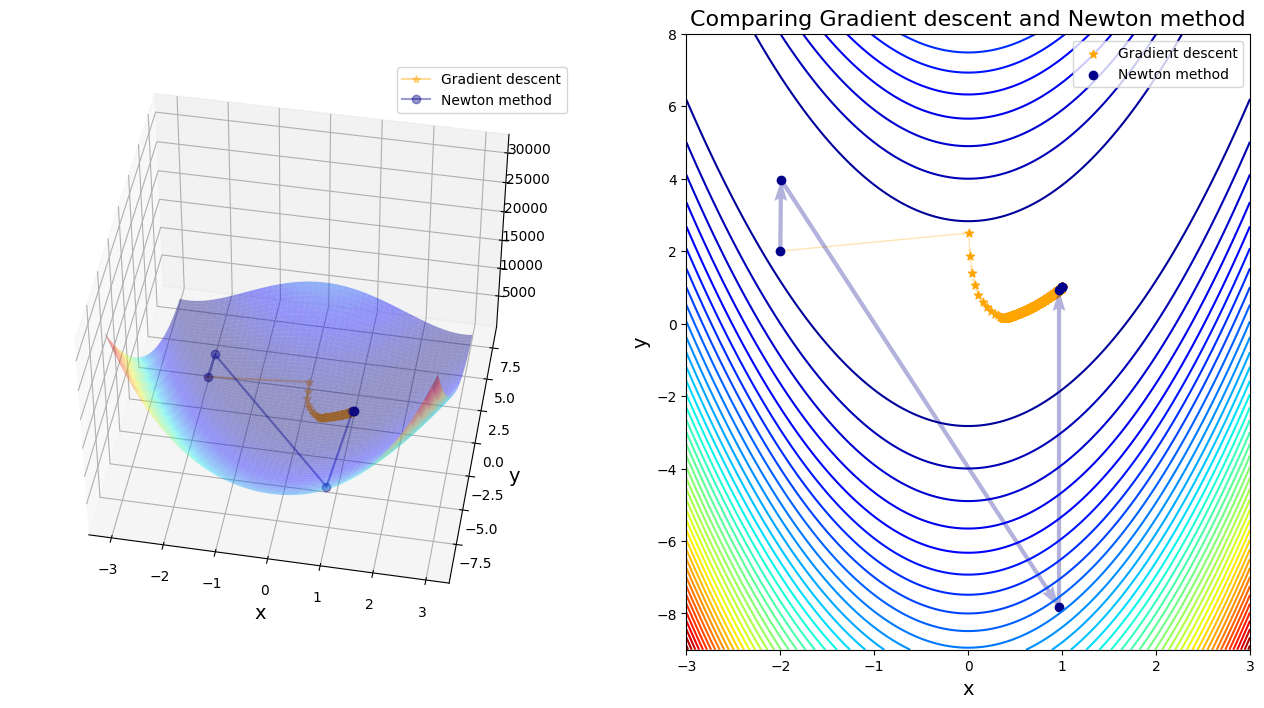

In [36]:
# Run gradient descent
traj_gd = gradient_descent(grad=Grad_Rosenbrock, 
                 start=np.array([-2.0, 2.0]), lr=0.00125, n_iter = 100_000, tol=1e-6, trajectory=True)

# Run Newton's method
traj_nt, _, _, _, = unconstrained_newton(Rosenbrock,Grad_Rosenbrock,Hessian_Rosenbrock,np.array([-2.0, 2.0]),verbose=False,
                                            algorithm="Newton",globalization="none")
# Plot 
Rosenbrock_comparison(traj_gd, traj_nt)

**Discussion:**

As expected, the GD algorithm finds the "valley" - however it struggles to reach the global minimum and gets stuck in a zigzag behavior. The minimum is found after thousand of steps. Trying different initial values leads to vastly different results, many of which are not close to the global minimum, and in many cases leading to infinite values (i.e. algorithm does not converge)

The Newton-Raphson method converges extremely rapidly to the global solution, despite the significant challenge posed by the Rosenbrock function. Irrespective of the starting point (within the scope of the graph above) the minimum is found within 4 - 6 iterations. Compare this to the several thousand iterations required by the gradient descent approach.

**Question:** What will happen if we change the learning rate ($\alpha$) of the gradient descent method? Try to plot it out.


In [37]:
### Add your solution

### 4.3. Single saddle point

Saddle points are much more common than local minima when it comes to optimization problems in a high number of dimensions (which is always the case when it comes to building deep learning models). Consider the following problem:

$$f(x, y) = 0.01x^2 - 0.1y^2$$

$$f'(x, y) = 0.02x - 0.2y$$

In [38]:
def saddle_func(x):
    '''
    Function of single saddle point case
    '''
    return .01*x[0]**2 - .1*x[1]**2

def saddle_grad(x):
    '''
    Gradient function of single saddle point case
    '''
    g1 = 2*.01*x[0]
    g2 = - 2*.1*x[1]
    return np.array([g1,g2])

def saddle_hes(x):
    '''
    Hessian matrix of single saddle point case
    '''
    return np.array([[.02,0],[0,-.2]]) 

In [39]:
def saddle_comparison(traj_1, traj_2):
    '''
    Visualization to compare the performance of GD and Newton method on space with a single saddle point

    Arguments:
        traj_1: trajectory of gradient descent
        traj_2: trajectory of Newton method

    Returns:
        A 3D plot and A 2D contour plot
    '''
    # Print out the steps of convergence
    print("After {} steps, gradient descent found minimizer x* = {}".format(len(traj_1), traj_1[-1]))
    print("After {} steps, Newton method found minimizer x* = {}".format(len(traj_2), traj_2[-1]))

    # Set the range and function values over space
    x = np.linspace(-3,3,100)
    y = np.linspace(-1,1,100)
    X, Y = np.meshgrid(x, y)
    Z = saddle_func((X, Y))

    # Split data for x and y
    iter_x_gd, iter_y_gd = traj_1[:, 0], traj_1[:, 1]
    traj_2 = np.array(traj_2)
    iter_x_nr, iter_y_nr = traj_2[:, 0], traj_2[:, 1]

    # Angles needed for quiver plot
    anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
    anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
    anglesx_nr = iter_x_nr[1:] - iter_x_nr[:-1]
    anglesy_nr = iter_y_nr[1:] - iter_y_nr[:-1]

    %matplotlib inline
    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x_gd,iter_y_gd, saddle_func((iter_x_gd,iter_y_gd)),color = 'orange', marker = '*', alpha = .4, label = 'Gradient descent')
    ax.plot(iter_x_nr,iter_y_nr, saddle_func((iter_x_nr,iter_y_nr)),color = 'darkblue', marker = 'o', alpha = .4, label = 'Newton method')
    ax.legend()

    #Rotate the initialization to help viewing the graph
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 60, cmap = 'jet')

    #Plotting the iterations and intermediate values
    ax.scatter(iter_x_gd,iter_y_gd,color = 'orange', marker = '*', label = 'Gradient descent')
    ax.quiver(iter_x_gd[:-1], iter_y_gd[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'orange', alpha = .3)
    ax.scatter(iter_x_nr,iter_y_nr,color = 'darkblue', marker = 'o',  label = 'Newton method')
    ax.quiver(iter_x_nr[:-1], iter_y_nr[:-1], anglesx_nr, anglesy_nr, scale_units = 'xy', angles = 'xy', scale = 1, color = 'darkblue', alpha = .3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend()
    ax.set_title('Comparing Gradient descent and Newton method', fontsize=16)

    plt.show()

After 46 steps, gradient descent found minimizer x* = [-1.27237097 -0.72890484]
After 3 steps, Newton method found minimizer x* = [0. 0.]


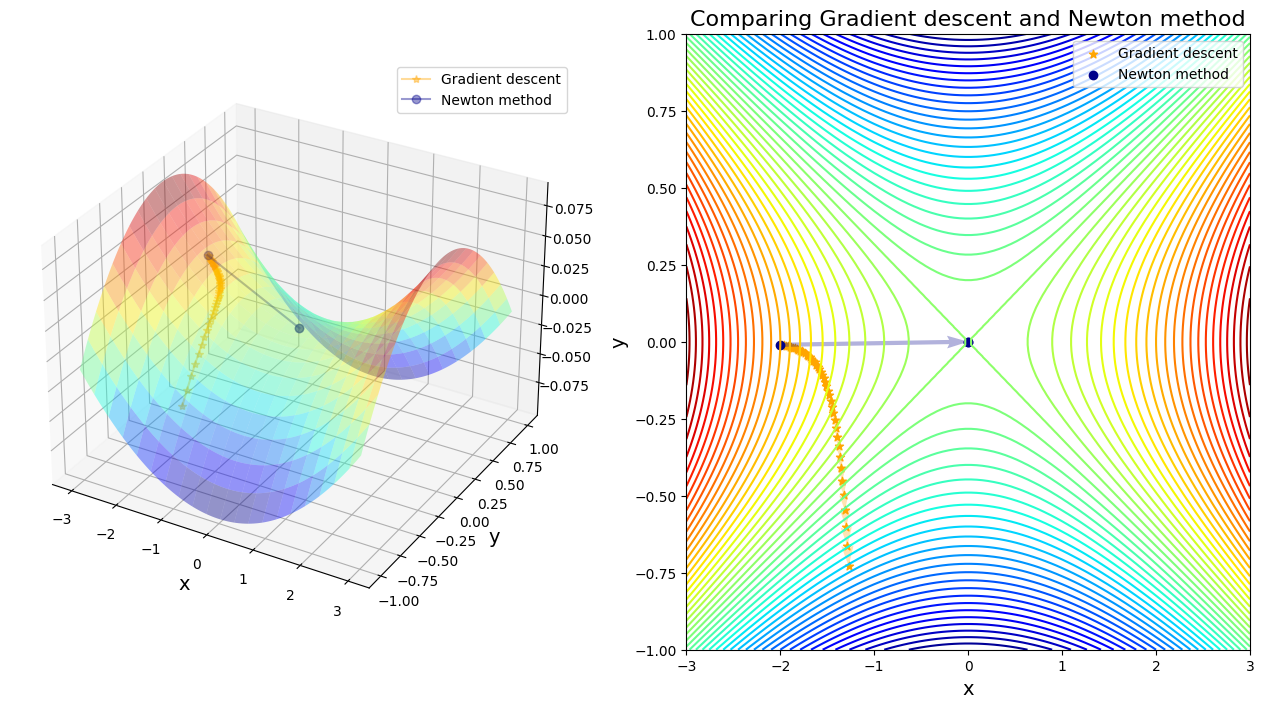

In [40]:
## Comparison with starting point = [-2.0, -0.01]
# Run gradient descent
traj_gd = gradient_descent(grad=saddle_grad,
                 start=np.array([-2.0, -0.01]), lr=0.5, n_iter = 45, tol=1e-04, trajectory=True)

# Run Newton's method
traj_nt, _, _, _, = unconstrained_newton(saddle_func, saddle_grad,saddle_hes,np.array([-2.0, -0.01]),verbose=False,
                                            algorithm="Newton",globalization="none")

# Plot 
saddle_comparison(traj_gd, traj_nt)

In single saddle points case, it seems gradient descent is more inclined to escape from saddle points compared to Newton's method. But what if facing multiple saddle points?

### 4.4. Multiple saddle points

Consider [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function), which is a multi-modal function, used to test the performance of optimization algorithms. The function is defined by:

$$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

It has one local maximum at $x = -0.270845$ and $y = -0.923039$ where $f(x,y) = 181.617$. 

And it has four different local minima:

* $f(3.0, 2.0) = 0.0$
* $f(-2.805118, 3.131312) = 0.0$
* $f(-3.779310, -3.283186) = 0.0$
* $f(3.584428, -1.848126) = 0.0$


In [41]:
def Himmer(x):
    '''
    Himmelblau's function
    '''
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def Grad_Himmer(x):
    '''
    Himmelblau's gradient function
    '''
    return np.array([2 * (-7 + x[0] + x[1]**2 + 2*x[0]*(-11 + x[0]**2 + x[1])), 2 * (-11 + x[0]**2 + x[1] + 2*x[1]* (-7 + x[0] + x[1]**2))])

def Hessian_Himmer(x):
    '''
    Himmelblau's Hessian matrix
    '''
    h11 = 4 * (x[0]**2 + x[1] - 11) + 8 * x[0]**2 + 2
    h12 = 4 * x[0] + 4 * x[1]
    h21 = 4 * x[0] + 4 * x[1]
    h22 = 4 * (x[0] + x[1]**2 - 7) + 8 * x[1]**2 + 2
    return np.array([[h11,h12],[h21,h22]]) 

In [42]:
## Comparison with starting point = [0.5, -2.0]
# Run gradient descent
traj_gd = gradient_descent(grad=Grad_Himmer, 
                 start=np.array([0.5, -2.0]), lr=0.001, n_iter = 1000, tol=1e-02, trajectory=True)

# Run Newton's method
traj_nt, _, _, _, = unconstrained_newton(Himmer, Grad_Himmer, Hessian_Himmer, np.array([0.5, -2.0]),verbose=False,
                                            algorithm="Newton",globalization="none")

print("After {} steps, gradient descent found minimizer x* = {}".format(len(traj_gd), traj_gd[-1]))
print("After {} steps, Newton method found minimizer x* = {}".format(len(traj_nt), traj_nt[-1]))

After 63 steps, gradient descent found minimizer x* = [ 3.48561945 -1.77701988]
After 5 steps, Newton method found minimizer x* = [-0.12796135 -1.95371498]


In [43]:
def comparison_plot(traj_1, traj_2, name):
    '''
    Visualization to compare the performance of GD and Newton method on Himmelblau's function

    Arguments:
        traj_1: trajectory of gradient descent
        traj_2: trajectory of Newton method
        name: the name of Newton-based method for printout
    
    Returns:
        A 3D plot and A 2D contour plot
    '''
    # Prepare the range and function values over space
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(x, y)
    Z = Himmer((X, Y))

    # Local minima
    local_x = np.array([3, -2.805118, -3.779310, 3.584428])
    local_y = np.array([2, 3.131312, -3.283186, -1.848126])

    # Split data for x and y
    iter_x_gd, iter_y_gd = traj_1[:, 0], traj_1[:, 1]
    traj_2 = np.array(traj_2)
    iter_x_nr, iter_y_nr = traj_2[:, 0], traj_2[:, 1]

    # Check the width of trajectories 
    if max(abs(iter_x_nr)) > 10 or max(abs(iter_y_nr)) > 10:
        print("Out of printable area!")
        return None

    # Angles needed for quiver plot
    anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
    anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
    anglesx_nr = iter_x_nr[1:] - iter_x_nr[:-1]
    anglesy_nr = iter_y_nr[1:] - iter_y_nr[:-1]

    %matplotlib inline
    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x_gd,iter_y_gd, Himmer((iter_x_gd,iter_y_gd)),color = 'orange', marker = '*', alpha = .4, label = 'Gradient descent')
    ax.plot(iter_x_nr,iter_y_nr, Himmer((iter_x_nr,iter_y_nr)),color = 'darkblue', marker = 'o', alpha = .4, label = name)
    ax.scatter(local_x, local_y, Himmer((local_x, local_y)), color='red', marker= '^', label = 'Local minima')
    ax.legend()

    #Rotate the initialization to help viewing the graph
    ax.view_init(45, 60)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 60, cmap = 'jet')

    #Plotting the iterations and intermediate values
    ax.scatter(iter_x_gd,iter_y_gd,color = 'orange', marker = '*', label = 'Gradient descent')
    ax.quiver(iter_x_gd[:-1], iter_y_gd[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'orange', alpha = .3)
    ax.scatter(iter_x_nr,iter_y_nr,color = 'darkblue', marker = 'o',  label = name)
    ax.quiver(iter_x_nr[:-1], iter_y_nr[:-1], anglesx_nr, anglesy_nr, scale_units = 'xy', angles = 'xy', scale = 1, color = 'darkblue', alpha = .3)
    ax.scatter(local_x, local_y, color='red', marker= '^', label = 'Local minima')
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend()
    ax.set_title('Comparing Gradient descent and ' + name, fontsize=16)

    plt.show()

In [44]:
def Himmelblau_comparison():
    '''
    Function to compare the gradient descent and other Newton-based method on Himmelblau's optimization

    Arguments: None

    Returns: 
        Optima, steps, and visualizations
    '''
    # Comparison with starting point = [0.5, -2.0]
    start = np.array([0.5, -2.0])
    
    # Run gradient descent
    traj_gd = gradient_descent(grad=Grad_Himmer, 
                 start=start, lr=0.01, n_iter = 1000, tol=1e-02, trajectory=True)
    
    # Set name of methods and globalizations
    alg = ["Newton", "SR1", "BFGS"]
    glb = ["none", "Line-search", "Trust-region"]

    # Prepare the range and function values over space
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(x, y)
    Z = Himmer((X, Y))
    
    # Angles needed for quiver plot
    iter_x_gd, iter_y_gd = traj_gd[:, 0], traj_gd[:, 1]
    anglesx = iter_x_gd[1:] - iter_x_gd[:-1]
    anglesy = iter_y_gd[1:] - iter_y_gd[:-1]
    
    # Set case number
    case_num = 1

    # Loop over methods
    for i in range(len(alg)):
        # Loop over globalizations
        for j in range(len(glb)):
            # Set name for printout
            name = alg[i]+' with '+glb[j] if glb[j] != "none" else alg[i] + " without globalization"
            print("Case {}: compare GD to ".format(case_num) + name)

            # Run Newton-based method
            traj_nt, _, _, _, = unconstrained_newton(Himmer, Grad_Himmer, Hessian_Himmer, start,verbose=False,
                                            algorithm=alg[i],globalization=glb[j])
            
            # Print out the steps of convergence
            print("After {} steps, GD found minimizer x* = {}".format(len(traj_gd), traj_gd[-1]))
            print("After {} steps, {} found minimizer x* = {}".format(len(traj_nt), name, traj_nt[-1]))
            
            # Run visualziation
            comparison_plot(traj_gd, traj_nt, name)
            print('\n\n\n\n')
            
            # Update case number
            case_num += 1
    
    # For the last case: Steepest-descent with Line-search (steepest-descent = gradient-descent)
    name = "Steepest-descent with Line-search"
    print("Case {}: compare GD to ".format(case_num) + name)

    # Run Steepest-descent with line search
    traj_nt, _, _, _, = unconstrained_newton(Himmer, Grad_Himmer, Hessian_Himmer, start,verbose=False,
                                            algorithm="Steepest-descent",globalization="Line-search")
    
    # Print out the steps of convergence
    print("After {} steps, GD found minimizer = {}".format(len(traj_gd), traj_gd[-1]))
    print("After {} steps, {} found minimizer = {}".format(len(traj_nt), name, traj_nt[-1]))
    
    # Run visualziation
    comparison_plot(traj_gd, traj_nt, name)

Case 1: compare GD to Newton without globalization
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 5 steps, Newton without globalization found minimizer x* = [-0.12796135 -1.95371498]


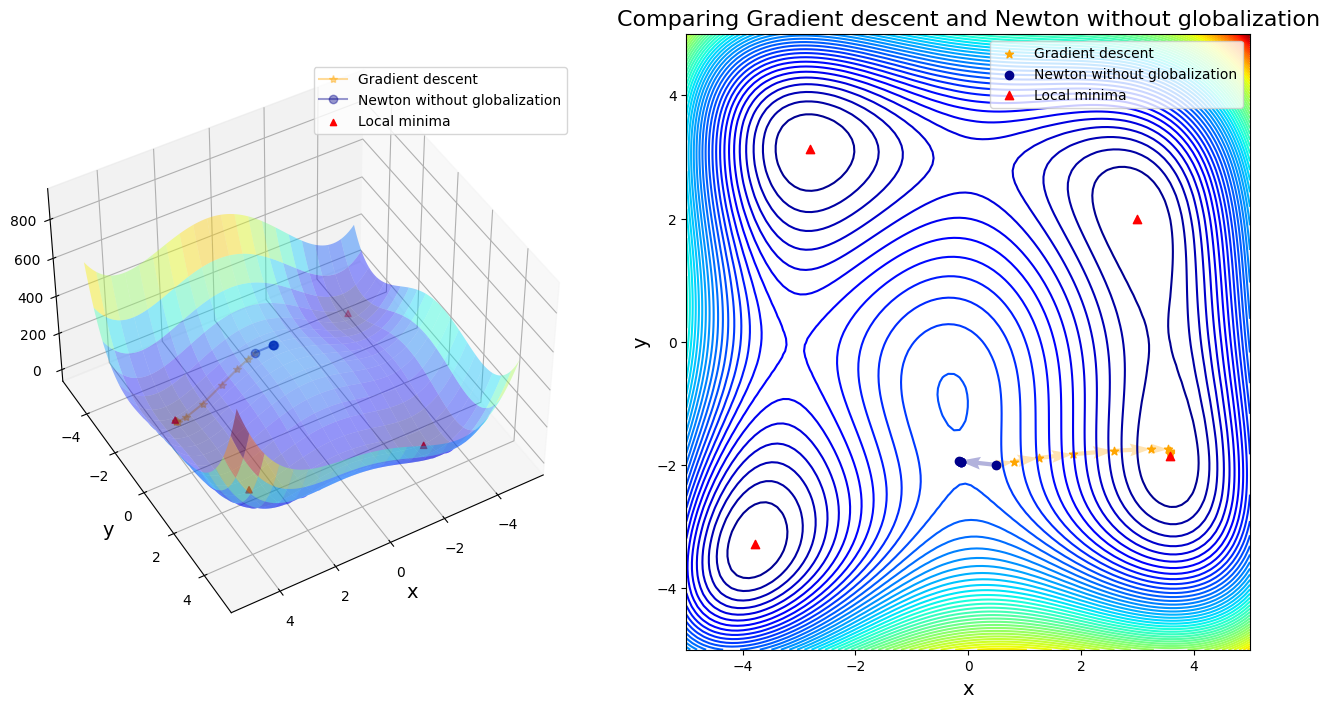






Case 2: compare GD to Newton with Line-search
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
Line search failed. Alpha = 0.9 is too short
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 8 steps, Newton with Line-search found minimizer x* = [-0.12796131 -1.95371497]


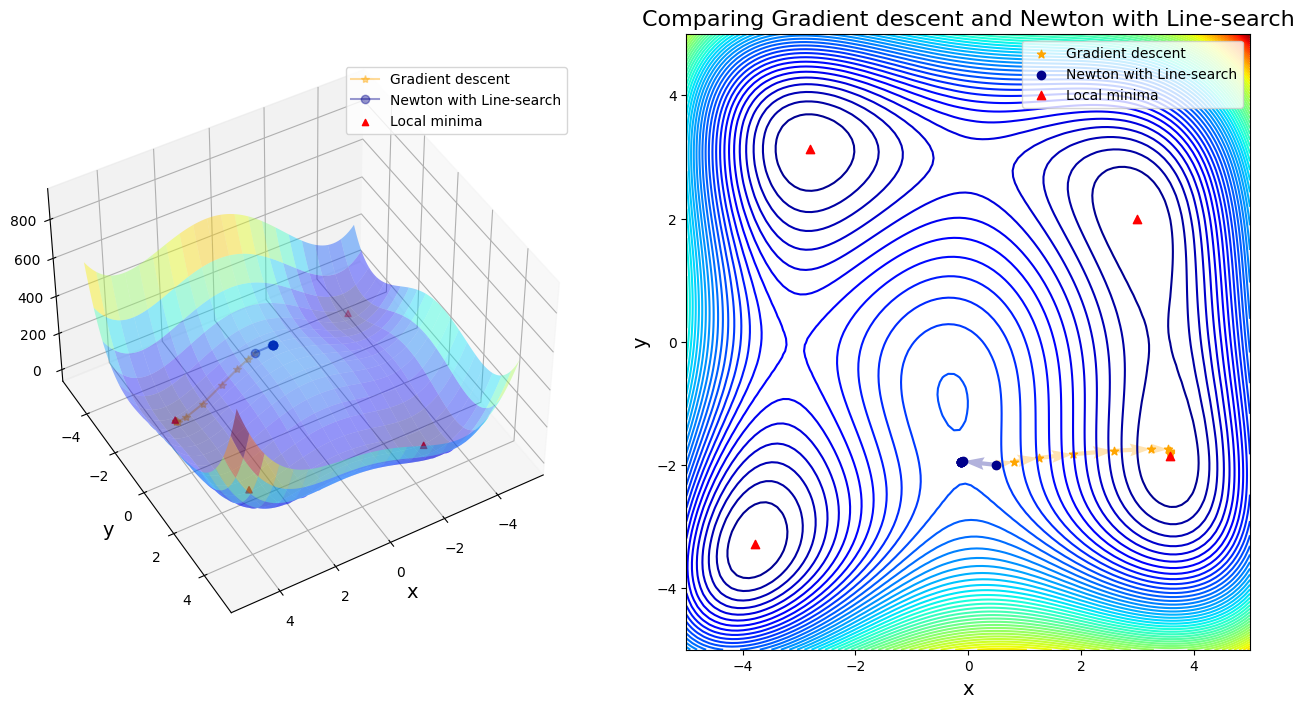






Case 3: compare GD to Newton with Trust-region
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 5 steps, Newton with Trust-region found minimizer x* = [-0.12796135 -1.95371498]


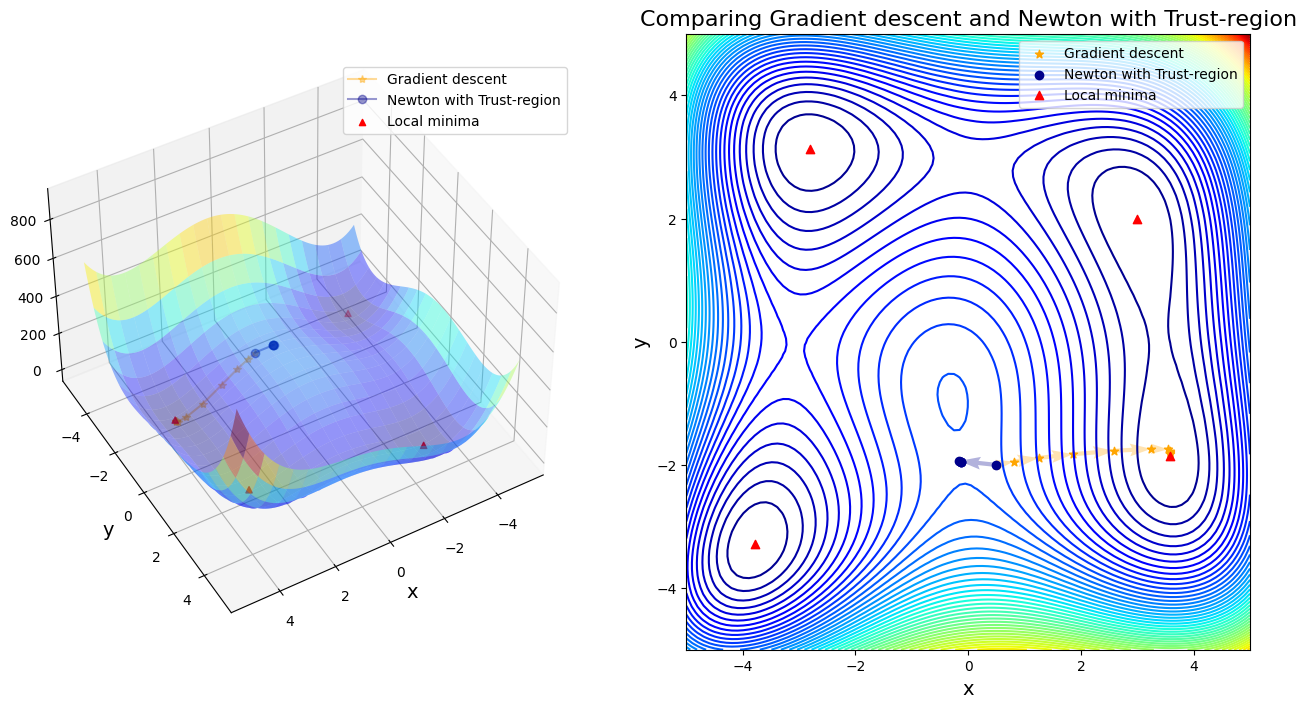






Case 4: compare GD to SR1 without globalization
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 20 steps, SR1 without globalization found minimizer x* = [-0.27084459 -0.92303856]
Out of printable area!





Case 5: compare GD to SR1 with Line-search
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 13 steps, SR1 with Line-search found minimizer x* = [ 3.58442834 -1.84812653]


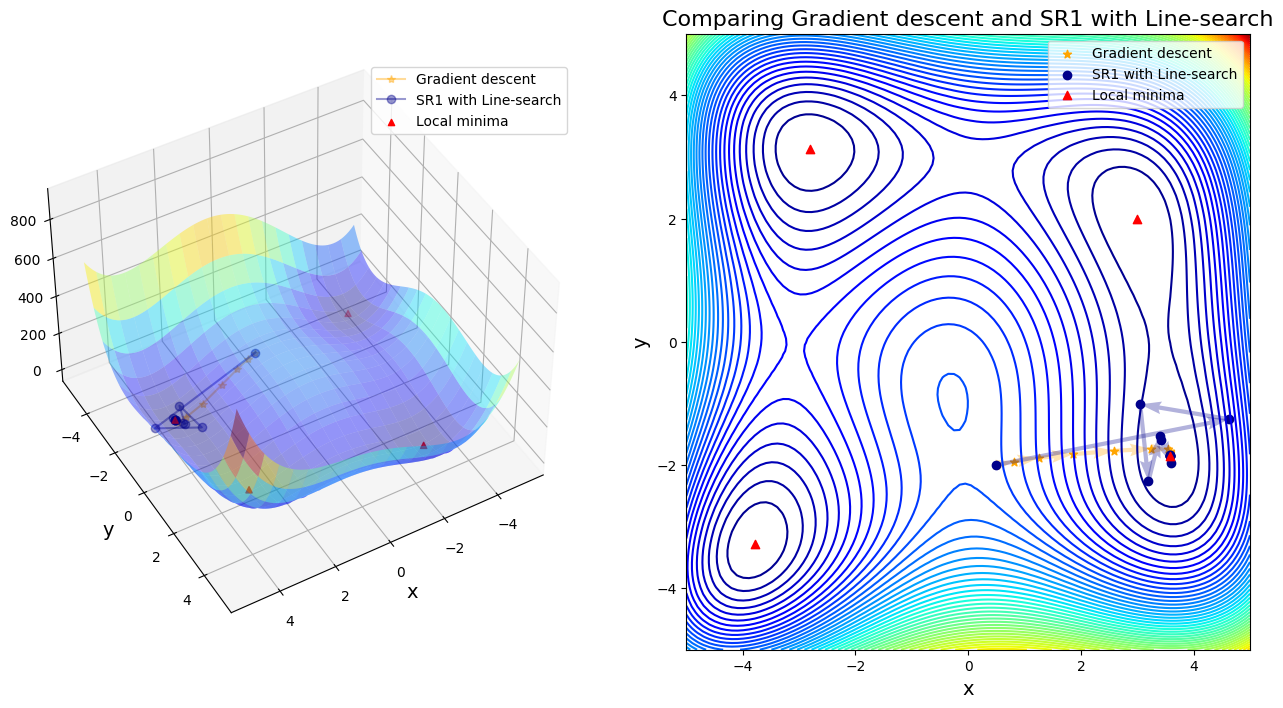






Case 6: compare GD to SR1 with Trust-region
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 13 steps, SR1 with Trust-region found minimizer x* = [3. 2.]


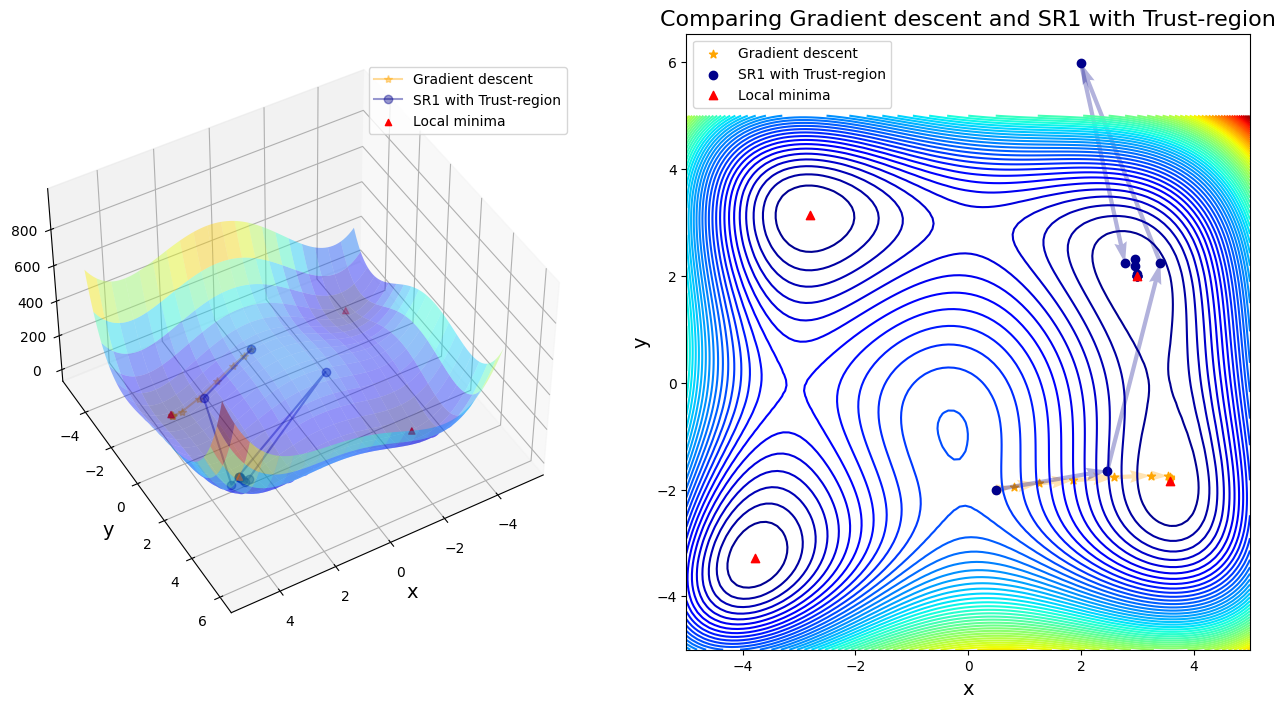






Case 7: compare GD to BFGS without globalization
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 48 steps, BFGS without globalization found minimizer x* = [3. 2.]
Out of printable area!





Case 8: compare GD to BFGS with Line-search
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 11 steps, BFGS with Line-search found minimizer x* = [ 3.58442834 -1.84812652]


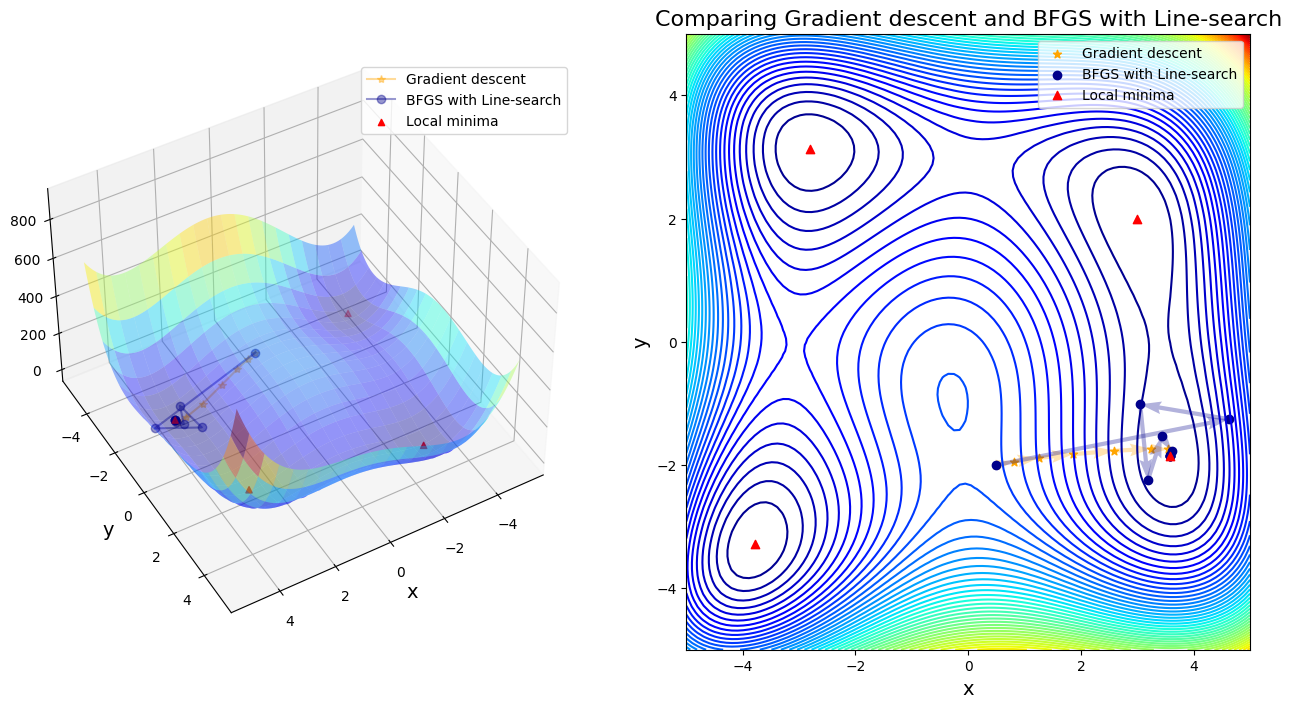






Case 9: compare GD to BFGS with Trust-region
After 11 steps, GD found minimizer x* = [ 3.58173398 -1.81859973]
After 20 steps, BFGS with Trust-region found minimizer x* = [ 3.58442834 -1.84812652]


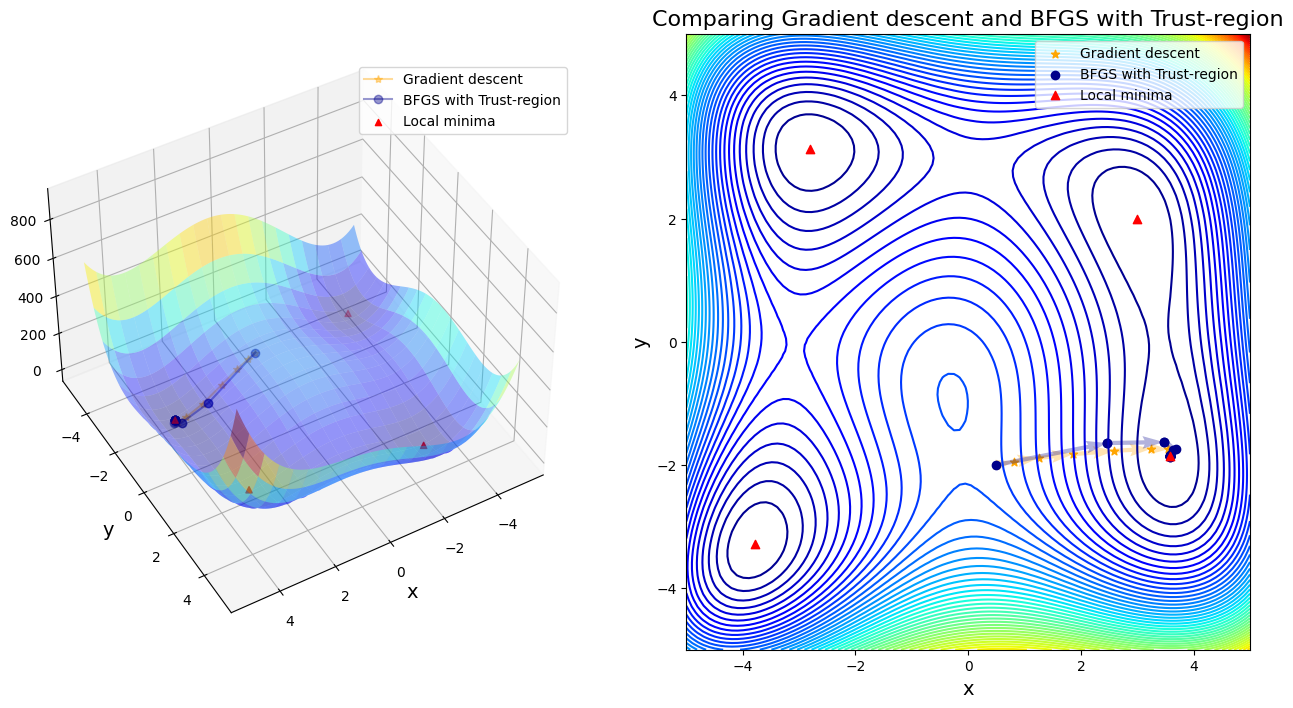






Case 10: compare GD to Steepest-descent with Line-search
After 11 steps, GD found minimizer = [ 3.58173398 -1.81859973]
After 29 steps, Steepest-descent with Line-search found minimizer = [ 3.58442806 -1.84812621]


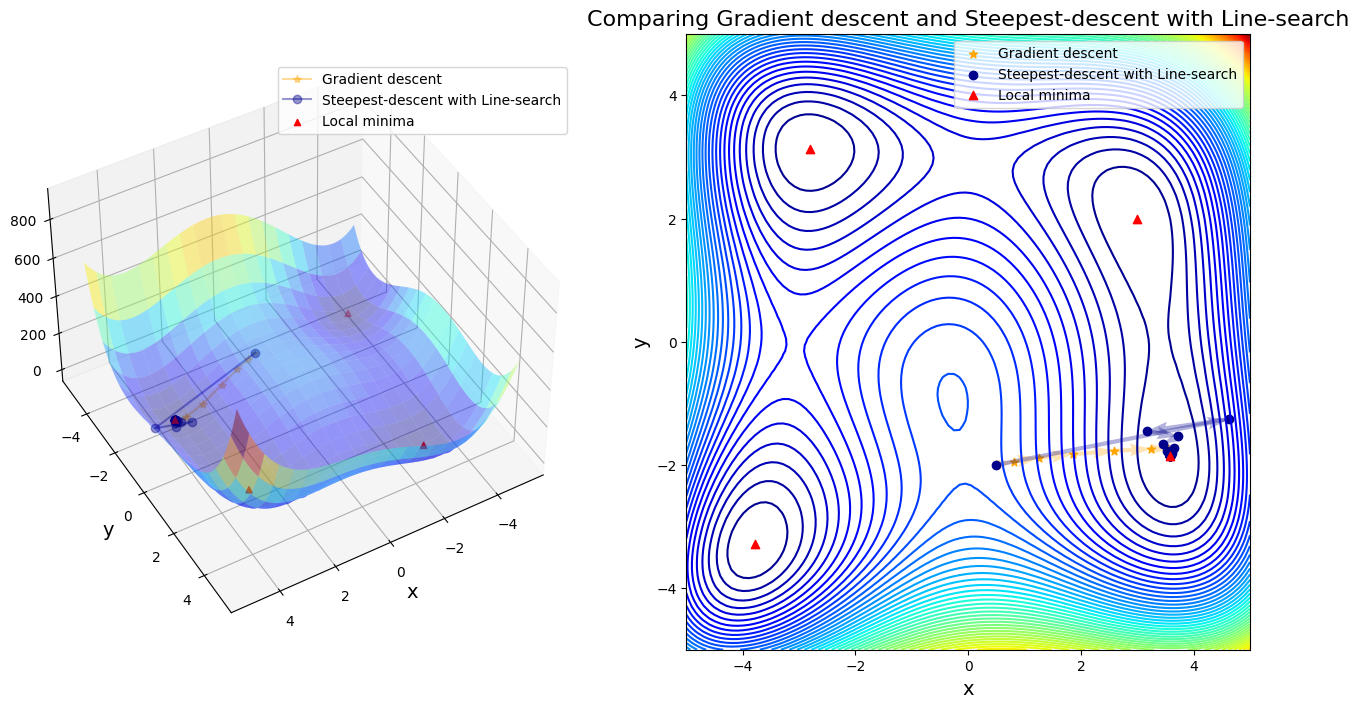

In [45]:
Himmelblau_comparison()

**Discussion:**

In first four cases, Newton-based methods (vanila Newton w/ and w/o globalization and SR1 w/o globalization) did not found any local minima. Rest of other cases found a minimum successfully. Gradient descent ($\alpha=0.01$) took 11 steps until convergent; BFGS took 48 steps instead. SR1 with globalization converged by 13 steps; BFGS with line search took 11 steps; BFGS with trust region took 20 steps.

If only considering the iteration steps, the cost of vanilla gradient descent is better than others. Moreover, Newton method attracts to saddle points and saddle points are common in machine learning, or in fact any multivariable optimization. That is the reason why we use a lot stochastic gradient descent in machine learning, rather than stochastic Newton-Raphson method.

**Paper's point of view:**

Indeed the ratio of the number of saddle points to local minima increases exponentially with the dimensionality $N$. While gradient descent dynamics are repelled away from a saddle point to lower error by following directions of negative curvature, the Newton method does not treat saddle points appropriately; as argued below, saddle-points instead become attractive under the Newton dynamics. (We can check further details in https://arxiv.org/pdf/1406.2572.pdf)

**Question:** Steepest-descent is exactly gradient descent, so why they took different iteration steps until convergence?

**Answer:**

Because steepest-descent chooses $\alpha = 1$, but gradient descent in this case chose $\alpha = 0.01$. If we run gradient descent with $\alpha = 1$ again, it would not converge. So thanks to line search that improves the stability of  steepest-descent.

**Question:** In "*Case 4: compare GD to SR1 without globalization*" and "*Case 7: compare GD to BFGS*", the trajectories of BFGS method without globalization were out of printable area for the current codes, please fix the plot and interpret why this search area is so wide. 

In [46]:
### Add your solution

### 4.5. Takeaway conclusion

**Computational cost analysis:**

To compare the computational cost, we have discussed the time complexity of gradient descent is $\mathcal{O}(N)$.

Newton's Method takes a long time per iteration and is memory-intensive Usually Newton's Method requires computing the second derivative, $H$, which is $O(N^2)$, where $N$ is the number of features. While computing the gradient, $g$, is only $O(N)$. But the next step is $H^{−1} g$, which is $O(N^3)$ to compute. So while computing the Hessian is expensive, inverting it or solving least squares is often even worse. (If you have sparse features, the asymptotics look better, but other methods also perform better, so sparsity doesn't make Newton **relatively** more appealing.) If using LU decomposition, some papers argue that it is $O(N^2)$.

For globalization methods, to evaluate time complexity is much more complicated, but many papers believe it should be yield to $\mathcal{O}(N)$ or $\mathcal{O}(N^2)$.

Hence, in the multiple saddle point case, we should square steps for all quasi-Newton no matter with or without globalization. In this rough comparison, we can clearly see the advantages of gradient descent (1) quite low computational cost and (2) not easily attracted by saddle points.

**How to improve Newton's method:**

We can approximate a Newton step at a lower computational cost per step but take more iterations to converge. Some examples:

* Because of the expense of inverting the Hessian, quasi-Newton methods like BFGS approximate the inverse Hessian, $H^{−1}$, by looking at how the gradient has changed over the last few steps.

* BFGS is still very memory-intensive in high-dimensional settings because it requires storing the entire $O(N^2)$ approximate inverse Hessian. Limited memory BFGS (L-BFGS) calculates the next step direction as the approximate inverse Hessian times the gradient, but it only requires storing the last several gradient updates; it doesn't explicitly store the approximate inverse Hessian.

* When you don't want to deal with approximating second derivatives at all, gradient descent is appealing because it only uses only first-order information. Gradient descent is implicitly approximating the inverse Hessian as the learning rate times the identity matrix.

* Sometimes you have a very large number of observations (data points), but you could learn almost as well from a smaller number of observations. When that is the case, you can use "batch methods", like stochastic gradient descent, that cycle through using subsets of the observations.

<!-- **More professional discussion:**

**Pros:** 

Indeed the ratio of the number of saddle points to local minima increases exponentially with the dimensionality $N$. While gradient descent dynamics are repelled away from a saddle point to lower error by following directions of negative curvature, the Newton method does not treat saddle points appropriately; as argued below, saddle-points instead become attractive under the Newton dynamics. (We can check further details in https://arxiv.org/pdf/1406.2572.pdf)


**Cons:**

Newton-based methods could be used more in machine learning by the following reasons. 

* According to the above paper, using line-search with the Wolfe conditions or using or trust regions prevents convergence to saddle points. A proper gradient descent implementation should be doing this too. 

* Using Newton's method does not require constructing the whole (dense) Hessian; you can apply the inverse of the Hessian to a vector with iterative methods that only use matrix-vector products (e.g., Krylov methods like conjugate gradient). See, for example, the CG-Steihaug trust region method.

* You can compute Hessian matrix-vector products efficiently by solving two higher order adjoint equations of the same form as the adjoint equation that is already used to compute the gradient (e.g., the work of two backpropagation steps in neural network training).

* Ill conditioning slows the convergence of iterative linear solvers, but it also slows gradient descent equally or worse. Using Newton's method instead of gradient descent shifts the difficulty from the nonlinear optimization stage (where not much can be done to improve the situation) to the linear algebra stage (where we can attack it with the entire arsenal of numerical linear algebra preconditioning techniques).

* Also, the computation shifts from "many many cheap steps" to "a few costly steps", opening up more opportunities for parallelism at the sub-step (linear algebra) level.


*To be metioned, Newton's method will not help you with L1 or other similar compressed sensing/sparsity promoting penalty functions, since they lack the required smoothness.* -->

## 5. Implement SGD on GLM with real dataset

In ordinary linear regression, we treat our outcome variable as a linear combination of several input variables plus some random noise, typically assumed to be Normally distributed. While this modeling approach is easily interpreted, efficiently implemented, and capable of accurately capturing many linear relationships, it does come with several significant limitations. A simple extension of linear models, a Generalized Linear Model (GLM) is able to relax some of most strict assumptions in linear regression. These assumptions include:

  * Linearity between the outcome and input variables
  * Normal distribution of error terms
  * Constant variance of error terms.
 
Relaxing these assumptions allows us to fit much more flexible models to much broader data types.

### 5.1. GLM Structure

Fitting a GLM first requires specifying two components: a random distribution for our outcome variable and a link function between the distribution’s mean parameter and its “linear predictor”.

**The Random Component**

The first step to building our GLM is identifying the distribution of the outcome variable. If the data has a binary response, we might want to use the Bernoulli or Binomial distributions. If we are working with count data, a Poisson model might be more useful. This distribution is typically assumed to come from the Exponential Family of distributions, which includes the Binomial, Poisson, Negative Binomial, Gamma, and Normal.

Each of these models can be expressed in terms of its mean parameter, $\mu = E(Y)$. For instance, we specify a binomial model as $Y \sim \text{Bin}(n, \mu/n)$, which can also be written as $Y \sim \text{Bin}(n, \mu/n)$. Once we estimate $\mu$, we model $Y$ as coming from a distribution indexed by $\hat{\mu}$ and our predicted value of $Y$ is simply $\hat{\mu}$.

**The Link Function**


In a GLM, we estimate $\mu$ as a non-linear function of a “linear predictor” $\eta$, which itself is a linear function of the data. The non-linear function connecting $\mu$ to $\eta$ is called the link function, and we determine it before model-fitting. The link function is written as a function of $\mu$, e.g., $\eta = g(\mu)$.

Suppose we have the following training data where each $x$ is a D-dimensional vector:

$$
\{\left(x_1, y_1\right), \left(x_2, y_2\right), \cdots, \left(x_N, y_N\right) \}
$$

We first write $\eta$ as a linear function of $x$ for each observation $n = 1, \cdots , N$:

$$
\eta_n = \theta_0 + \theta_1 x_{n,2} + \theta_1 x_{n,2} + \cdots + \theta_D x_{n,d}
$$

Then we connect $\eta$ to $\mu$ with the link function:

$$
\eta_n = g(\mu_n)
$$

Finally, we get the loss function:

$$
\mathcal{L}_n = \sum_{n=1}^N \mathcal{L} (\hat{y}_n, y_n) = \sum_{n=1}^N \mathcal{L} (\hat{\mu}_n, y_n) = \sum_{n=1}^N \mathcal{L} (g^{-1}(\eta_n), y_n)
$$

**Logistic Regression — A GLM for Binary Data**

In logistic regression, we model our outputs as independent Bernoulli trials, i.e., we assume:

$$
Y_n \sim \text{Bern}(p_n)
$$

Then we need to find a way to relate our linear predictor $\eta$ to our parameter $p$. Since $p$ is between $0$ and $1$ and $\eta$ can be any real number, a natural choice is the log-odds. I.e.,

$$
\eta_n = g(p_n) = \text{log}\left(\frac{p_n}{1-p_n}\right)
$$

Inversely, we use the sigmoid function to get from $\eta$ to $p$ (which will be called as $S$ then):

$$
p_n = g^{-1}(\eta_n) = \frac{1}{1+\text{exp}(-\eta_n)} = S(\eta_n)
$$

Then, find the negative log likelihood:


$$
L(p; X, y) = \prod_{n=1}^N p_n^{y_n} (1-p_n)^{1-y_n}
$$

$$
-\text{log}(L(p; X, y)) = - \sum_{n=1}^N y_n \text{log}(p_n) + (1-y_n)\text{log}(1-p_n)
$$

$$
\mathcal{L} = -\text{log}(L(\theta ; X, y)) = -\sum_{n=1}^N y_n \text{log}(S(\beta^T x_n)) + (1-y_n)\text{log}(1-S(\beta^T x_n))
$$

Then we find the values of $\theta$ to minimize this loss. Unfortunately, in the logistic regression case, there is no closed-form solution, so we must use gradient descent. So, let’s find the derivative of the loss function with respect to $\theta$.

$$
S'(x) = \frac{\text{exp}(-x)}{(1+\text{exp}(-x))^2} = S(x)(1-S(x))
$$

Then we can derive the entire gradient:

$$
\frac{\partial \mathcal{L}}{\partial \theta} = - \sum_{n=1}^N y_n (1-S(\theta^T x_n))x_n - (1-y_n)S(\theta^T x_n)x_n
$$

### 5.2. Data Wrangling

While the aim of this section is to build a logistic regression model, the dataset is known to have 3 different classes. As mentioned above, logistic regress is named for binary class problems. The [data](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey) produced by [Lennart Grosser](https://www.kaggle.com/lucidlenn) consists of **10,000** observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [47]:
# data load
data = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
data.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [48]:
# check data analysis
data.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    0.000000e+00     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

Except for the 'rerun' column, there are no missing values in the dataset. Except the 'dec' and 'spaceobjid', the mean and medians (50 percentile) of all features are quite similar.

With understanding of the data spread and features, we can prepare the data needed to develop the model.

Since we do not have to deal with missing values except for the 'rerun' column, let us find out the number of unique values in each column.

In [49]:
for cols in data.columns:
    print(cols,':',data[cols].nunique())

objid : 1
ra : 10000
dec : 10000
u : 9730
g : 9817
r : 9852
i : 9890
z : 9896
run : 23
rerun : 1
camcol : 6
field : 703
specobjid : 6349
class : 3
redshift : 9637
plate : 487
mjd : 355
fiberid : 892


As provided in the data description, 'class' is the only feature that isn't continuous which has to be predicted. While the dataset has 10000 data points, it can be noticed that there are columns like 'objid' and 'rerun' that only have one value. These columns can be removed. The 'spaceobjid' feature is an object identifier with fairly large values. Similarly, the 'plate' feature is a number identifying the plate used in the telescope. These feature being IDs cannot be scaled and thus it can be removed as well.

In [50]:
# Delete columns
data.drop(['objid', 'rerun', 'specobjid', 'plate'], axis=1, inplace=True)

Analyze the correlation among the features in the dataset.

<ipython-input-51-ee9f42d61847>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr(), fignum=f.number)


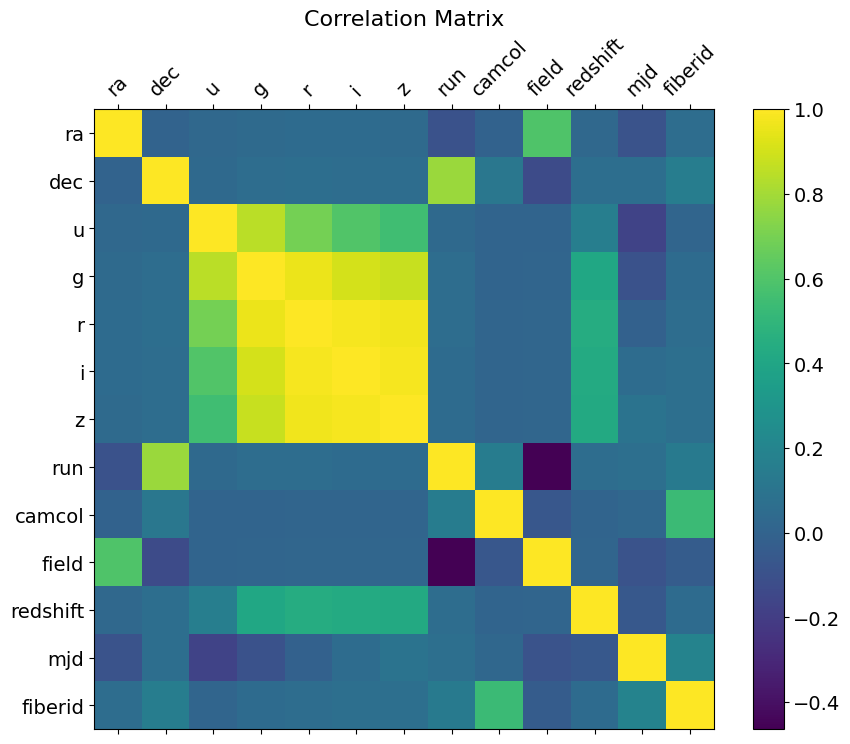

In [51]:
# visualize Pearson correlation coefficient
f = plt.figure(figsize=(10, 8))
# compute the coefficient and plot
plt.matshow(data.corr(), fignum=f.number)
# change ticks
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The correlation matrix above shows that features g, r , i , z are strongly correlated with each other. While the feature u is only correlated to g, it seems independent from the others. Since we are dealing with a simple logistic regression model, we shall eliminate the correlation by removing columns g, r and i. Feature u is not highly correlated with other features and among g, r, i, z, the feature z is least correlated to u. Thus we retain these two columns among the 5 bands of the telescope.

Feature 'mjd' is also highly correlated with 'plate', although they do not have any meaningful data in common. Since mjd is the 'Modified Julian Date' that identifies the date the SDSS image was taken, we can eliminate it along with the others while retaining the 'plate' feature.

In [52]:
data.drop(['g', 'r', 'i', 'mjd'], axis=1, inplace=True)

Now analyze all the remaining columns. We start with the features that describe a field within an image taken by the SDSS.

In [53]:
# 1. 'run' column identifies specific scan 
data['run'].value_counts()

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1231     245
1331     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
727        4
1356       4
1332       1
1119       1
Name: run, dtype: int64

In [54]:
# 2. 'camcol' column identifies scanline with 'run' 
data['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

Since this feature is of an integer type and only has 6 values, it can be treated as a categorical variable. Dummy variables can be created to accommodate all the factors in this features.

In [55]:
# replace 'camcol' with dummy varaibles
dummy_df = pd.get_dummies(data['camcol'])
new_data = pd.concat([data, dummy_df], axis=1)
new_data.drop('camcol', axis=1, inplace=True)
new_data.head()

ra       dec         u         z  run  field   class  redshift  \
0  183.531326  0.089693  19.47406  15.22531  752    267    STAR -0.000009   
1  183.598370  0.135285  18.66280  16.39150  752    267    STAR -0.000055   
2  183.680207  0.126185  19.38298  16.80125  752    268  GALAXY  0.123111   
3  183.870529  0.049911  17.76536  15.90438  752    269    STAR -0.000111   
4  183.883288  0.102557  17.55025  16.61326  752    269    STAR  0.000590   

   fiberid  1  2  3  4  5  6  
0      491  0  0  0  1  0  0  
1      541  0  0  0  1  0  0  
2      513  0  0  0  1  0  0  
3      510  0  0  0  1  0  0  
4      512  0  0  0  1  0  0

In [56]:
# Analyse class column
data['class'].value_counts(normalize=True)*100

GALAXY    49.98
STAR      41.52
QSO        8.50
Name: class, dtype: float64

Almost 50% of the dataset contains data identifying galaxies while 41.5% are stars with the remaining 8% as quasars. We shall be eliminating quasars ('QSO') and develop a binary classification model.

In [57]:
# Create subset of data
data1 = new_data[new_data['class']!='QSO']

Analyze the mean values of the features w.r.t. the 'class' factor.

In [58]:
# Analyse the mean values of the features w.r.t. the 'class' factor
data1.groupby('class').mean()

ra        dec          u          z         run       field  \
class                                                                         
GALAXY  177.333570  15.764372  18.804339  16.017923  996.711685  300.963585   
STAR    172.962158  12.544824  18.330439  16.531119  950.886561  303.552264   

        redshift     fiberid         1         2         3         4  \
class                                                                  
GALAXY  0.080325  340.108844  0.137455  0.163665  0.150460  0.180272   
STAR    0.000043  362.838391  0.119701  0.182563  0.166185  0.185934   

               5         6  
class                       
GALAXY  0.191477  0.176671  
STAR    0.168593  0.177023

While most of the feature mean values are similar for either class, there are a few with noteworthy differences. The right ascension (ra), declination (dec) and 'redshift' have higher means for the GALAXY class, suggesting that higher values of these 3 features indicate the object to be a galaxy.

### 5.3. Developing the Model

The data has been cleaned and prepared to now develop a model. In short, the logistic regression model calculates the probabilities of a data point belonging to a certain class. The model first calculates a linear regression model and then uses the sigmoid function to calculate the probability. The final step is using a decision boundary to decide which class the data point belongs when compared to the decision boundary values.

To create and test the model, we will need train and test data sets.

In [59]:
# import function for data split
from sklearn.model_selection import train_test_split

# build input matrix X and output vector y
X = data1.drop('class', axis=1)
y = data1['class']

# Train and test set split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1551)

In [60]:
# check the first couple of rows of inputs for training dataset
X_train.head()

ra        dec         u         z   run  field  redshift  \
4621  244.870089   0.513505  19.51077  16.42123   752    677  0.132896   
7446  199.748564  67.118753  17.57432  14.69458  1412    207 -0.000109   
1217  146.462979   0.638698  17.70856  14.98198   756    205  0.030323   
2213   27.837241  13.106702  19.03296  16.73755  1035    146  0.062437   
6313  190.379369  68.460756  19.58128  15.76584  1350    382  0.109400   

      fiberid  1  2  3  4  5  6  
4621      552  0  0  0  0  1  0  
7446      332  0  0  0  1  0  0  
1217      506  0  0  0  0  1  0  
2213      258  0  1  0  0  0  0  
6313      576  0  0  0  0  0  1

Notice the values of the features above. All columns excluding the dummy variables for the 'camcol' feature are of varying scales. In order for the logistic regression model to calculate the distances between the points, the data should be across a similar range. Generating a model with varying data scales result in an unstable prediction. To avoid that, we use MinMax scaler (among others) to scale the features.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# implement scaler on training set
train_scale = MinMaxScaler().fit(X_train[['ra', 'dec', 'u', 'z', 'run', 'field', 'redshift', 'fiberid']])
train_trans_data = train_scale.transform(X_train[['ra', 'dec', 'u', 'z', 'run', 'field', 'redshift', 'fiberid']])
X_train = np.column_stack([train_trans_data,X_train[[1,2,3,4,5,6]]])

# scale the test set as well
test_trans_data = train_scale.transform(X_test[['ra', 'dec', 'u', 'z', 'run', 'field', 'redshift', 'fiberid']])
X_test = np.column_stack([test_trans_data,X_test[[1,2,3,4,5,6]]])

Use Label Encoder to convert the classes ('GALAXY', 'STAR') to numeric values to be used in the model.

In [62]:
# implement LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# transform on train and test output set
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

**Question:** try to print out a couple of lines before and after `LabelEncoder`, and answer what the effect of this function?

In [63]:
### Add your solution

Then we need to code the cost and gradient function for logistic regression. Recall the given formulas in "GLM Structure" and complete the following codes.

In [64]:
# Sigmoid function
def sigmoid(val):
    '''
    The sigmoid function
    
    Arguments:
        val = the given value to sigmoid
    
    Returns:
        y = output after sigmoid
    '''
    ### BEGIN SOLUTION
    y = 1/(1 + np.exp(-val))
    ### END SOLUTION
    return y

In [65]:
def lg_cost(X,y,theta):
    ''' 
    Function to calculate cost function for logistic regression 
    by assuming a hypothesis of form h = theta.T*X

    Arguments:
        X = array of features
        y = array of training examples
        theta = array of parameters for hypothesis

    Returns:
        J = cost function
    '''
    # Number of data points 
    m = len(y)

    # Insert unit column to X feature matrix
    ones = np.ones(m)
    x_new = np.vstack((ones,X.T)).T

    ### BEGIN SOLUTION
    # Compute predictions
    z = np.dot(x_new, theta)
    h = sigmoid(z)
    
    # Compute cost
    J = 1/m*(-y@np.log(h) - (1-y)@np.log(1-h)) #natural logs
    ### END SOLUTION

    return J

In [66]:
def lg_gradient(x, y, theta):
    '''
    Function to calculate gradient for logistic regression 
    
    Arguments:
        X = array of features
        y = array of training examples
        theta = array of parameters for hypothesis

    Returns:
        grad = gradient
    '''
    # Number of data points
    m = len(y)

    # Insert unit column to X feature matrix
    ones = np.ones(m)
    x_new = np.vstack((ones,x.T)).T
    
    ### BEGIN SOLUTION
    # Compute predictions
    z = np.dot(x_new, theta)
    h = sigmoid(z)
    
    # Compute gradient
    grad = np.dot((h-y),x_new).transpose()/m
    ### END SOLUTION

    return grad

In [67]:
# give a starting vector
theta0 = [1]*(X_train.shape[1] + 1)

# optimize the logistic regression model by SGD
traj_out, cost_out = sgd(lg_gradient, X_train, y_train, start=theta0, lr=0.5, batch_size=500, n_iter=2000, random_state=42, trajectory=True, costfunc=lg_cost)

Text(0, 0.5, 'Cost')

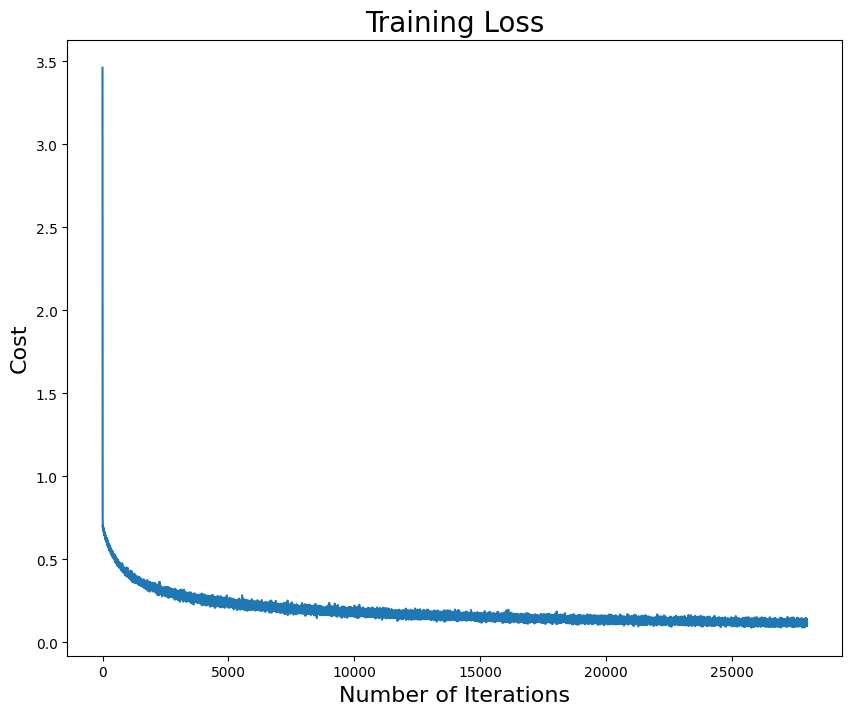

In [68]:
# plot the cost change
plt.figure(figsize=(10,8))
plt.title('Training Loss', fontsize=20)
plt.plot(cost_out)
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

**Question:** Describe how cost changes along iterations. And can we say it is already convergent? What else we could do to validate the convergence?

---

**Answer:** The plot above shows that the error/cost function values sharply decline in the first few iterations and proceed to reduce slowly over the rest of the iterations. it can be assumed that the local minima was achieved at the end. This shows that the logistic regression model has converged with optimum values for the coefficients. Using these new values, we can predict the values for the test set and check the goodness of fit using model metrics.

In [69]:
## predict on test set
### BEGIN SOLUTION
# prepare inputs
X_test1 = np.column_stack(([1]*X_test.shape[0],X_test)) # add bias column to X_test

# Predict values 
y_vals = np.matmul(X_test1, traj_out[-1]) # Multiply theta with X_test
y_prob = sigmoid(y_vals) # calculate probabilities
y_pred = [1 if y>0.5 else 0 for y in y_prob] # Convert probabilities to classes with 0.5 decision boundary
### END SOLUTION


## Calculate accuracy and model fit metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
# compute the accuracy score
accuracy = accuracy_score(y_test, y_pred,normalize=True)
# compute the confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)

The accuracy of the model is : 96.7 %
Confusion Matrix:
 [[1196   74]
 [   1 1017]]


Based on the values of the confusion matrix, we can calculate the precision, recall and F-score to estimate the goodness of the model fit.

In [70]:
# calculate the precision, recall and F-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.9322 
Recall =  0.999 
F-Score =  0.9644


While the precision is a little low, the recall and F-score are comparatively higher. A higher recall value indicates how many of the actual true values were correctly predicted by the model and precision indicates how many of the values predicted true were, in fact, correct. A 0.9644 F-score indicates a good model fit.

The final test of the goodness of fit of the model is analyzing the AUC plot.

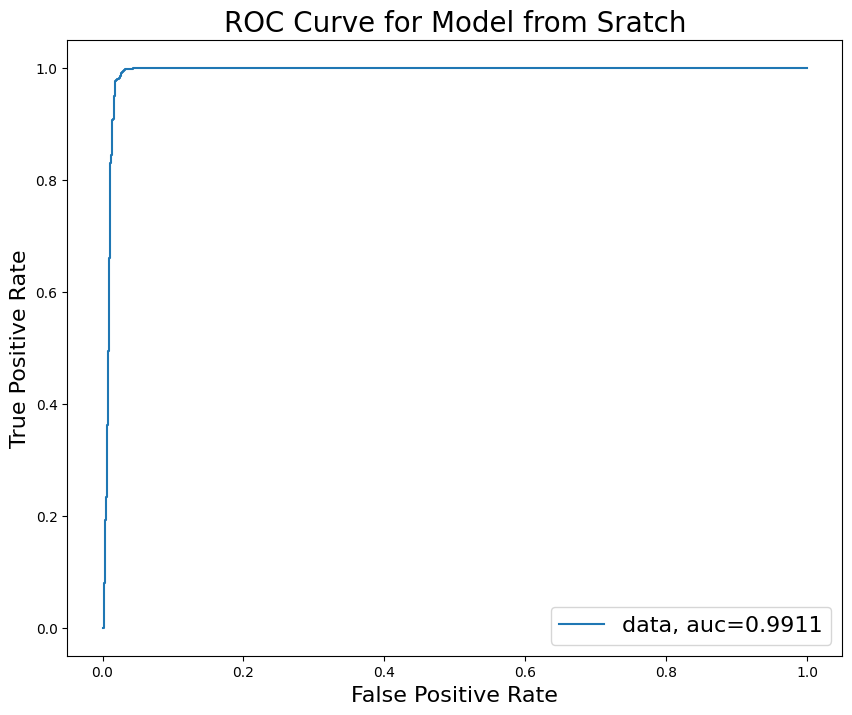

In [71]:
## plot AUC
from sklearn.metrics import roc_curve, roc_auc_score
# ROC curve
fpr, tpr, _ = roc_curve(y_test,  y_prob)
# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# plot
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="data, auc="+str(round(auc,4)))
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve for Model from Sratch", fontsize=20)
plt.legend(loc=4, fontsize=16)
plt.show()

The AUC score for the developed model is 0.9911. With its close proximity to 1, it can be stated that the model is good at distinguishing between the two classes.

### 5.4. Using other package

We have created the model from scratch and produced one that classifies the data well. To compare the goodness of fit of our model, we use the predefined `scikit-learn` package to create a logistic regression model using stochastic gradient descent (SGD) on the same training and test set.

In [72]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='log', max_iter=100) # create a classifier using logistic regression using SGD
model = classifier.fit(X_train, y_train) # fit the model on the training data
y_pred = model.predict(X_test) # predict values on test set

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [73]:
## Deteremine model accuracy and goodness of fit
# Calculate accuracy
accuracy = accuracy_score(np.array(y_test),np.array(y_pred),normalize=True)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)

# Print out
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 96.0 %
Confusion Matrix:
 [[1196   74]
 [   8 1010]]


While the accuracy of the model is almost the same as our original model, notice the slight difference in the confusion matrix. The metrics can tell the story further.

In [74]:
# Calculate precision, recall, F-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.9317 
Recall =  0.9921 
F-Score =  0.961


Here we have an almost-perfect recall with the in-built model and a relatively higher score for the precision and F-score than our model, indicating that the in-built model is better than ours.

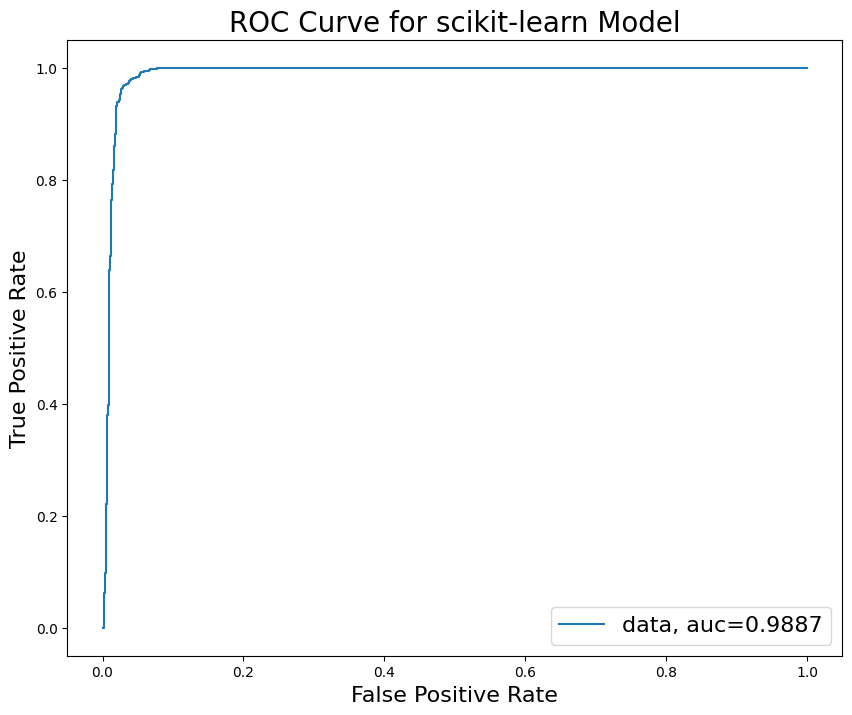

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = classifier.predict_proba(X_test)[::,1] # get probabilities of the model prediction
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # calculate ROC curve
auc = roc_auc_score(y_test, y_pred_proba) # calculate AUC

# Plot
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="data, auc="+str(round(auc,4)))
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve for scikit-learn Model", fontsize=20)
plt.legend(loc=4, fontsize=16)
plt.show()

The AUC score for the `scikit-learn` model is close to our model as well. This goes to show that our model could be as good as the in-built model for classifying data.

## 6. Summary

This notebook introduces and implements (stochastic) gradient descent methods on several examples. By parametric study and comparison with Newton's method, this work aims to help readers to understand:

* Stochastic gradient descent can be challenging to optimize due to the difficulty in selecting an appropriate learning rate. A learning rate that is too small leads to slow convergence, whereas a learning rate that is too large can hinder convergence and cause the loss function to oscillate or even diverge. However, the performance of SGD can be improved by using adaptive learning or momentum methods.

* Large-scaled machine learning problems are hard to train and their loss functions are costly to compute. However, using the stochastic approach of minibatches does not take higher cost but can yield better solutions in fewer epochs. In a sense, the noise in the direction enables jumping across the trenches, whereas a full-batch approach will converge in the trench it started with.

* Newton's method is faster than gradient descent in moderately difficult cases. As the dimensionality $N$ increases, the number of saddle points grows exponentially, gradient descent dynamics can escape saddle points by following directions of negative curvature, leading to a lower error. However, the Newton method is not effective at handling saddle points, which can hinder the optimization process.

## References

**(Stochastic) Gradient Descent:**

[1] Goodfellow, Ian, et al. ”Deep learning, volume 1.” (2016). https://www.deeplearningbook.org/contents/ml.html

[2] Xu, Wei. ”Towards optimal one pass large scale learning with averaged stochastic gradient descent.” arXiv preprint arXiv:1107.2490 (2011).

[3] Dauphin, Yann N., et al. "Identifying and attacking the saddle point problem in high-dimensional non-convex optimization." Advances in neural information processing systems 27 (2014).

[4] Sebastian Ruder: https://www.ruder.io/optimizing-gradient-descent/

[5] Mirko Stojiljković: https://realpython.com/gradient-descent-algorithm-python/

[6] Jeremy Jordan: https://www.jeremyjordan.me/gradient-descent/

[7] Raimi Karim: https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9

---

**(Quasi-)Newton's Method:**

[8] Jorge, Nocedal, and J. Wright Stephen. ”Numerical optimization.” (2006)

[9] Class website: https://ndcbe.github.io/optimization/notebooks/3/Newton-Methods.html

[10] Class assignment: https://ndcbe.github.io/optimization/notebooks/assignments/Algorithms3.html


---

**Case Study:**

[11] Xavier Bourret Sicotte: https://xavierbourretsicotte.github.io/Intro_optimization.html#Comparing-Newton-and-Gradient-Descent-in-presence-of-a-single-saddle-point

[12] Wikipedia: Test functions for optimization. https://en.wikipedia.org/wiki/Test_functions_for_optimization

---

**Generalized Linear Model:**

[13] Daniel Friedman: https://towardsdatascience.com/fitting-glms-by-hand-189c02af33a8

[14] Marissa Fernandes: https://www.kaggle.com/code/marissafernandes/logistic-regression-sgd-in-python-from-scratch/notebook

[15] Lennart Grosser: https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey